## Reference
**For more Tutorial:** https://github.com/berkayalan

## Content


**Unsupervised Learning - Clustering**

***

- What's Unsupervised Learning?
- Clustering
- K-Means Clustering (Theory - Exploratory Data Analysis - Preprocessing - Model- Tuning)
    - Color - Image Quantization 
- Hierarchical Clustering (Theory - Model)
- DBSCAN (Density-based spatial clustering) (Theory - Model)

## Resources

- **The Elements of  Statistical Learning** - Trevor Hastie,  Robert Tibshirani, Jerome Friedman -  Data Mining, Inference, and Prediction (Springer Series in Statistics) 

- **An Introduction to Statistical Learning** - Trevor Hastie,  Robert Tibshirani, Daniela Witten, Gareth James

- [**Machine Learning by Shervine Amidi**](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-unsupervised-learning)

- [**10 Clustering Algorithms With Python by Machine Learning Mastery**](https://machinelearningmastery.com/clustering-algorithms-with-python/)

- [**K-Means: Getting The Optimal Number Of Clusters**](https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/)

- [**Elbow Method for optimal value of k in K-Means**](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/)

- [**Silhouette Algorithm to determine the optimal value of k**](https://www.geeksforgeeks.org/silhouette-algorithm-to-determine-the-optimal-value-of-k/?ref=rp)

- [**4 Distance Measures for Machine Learning by Machine Learning Mastery**](https://machinelearningmastery.com/distance-measures-for-machine-learning/)

- [**Working with Images in Python using Matplotlib**](https://www.geeksforgeeks.org/working-with-images-in-python-using-matplotlib/)

- [**Hierarchical Clustering by Statquest**](https://www.youtube.com/watch?v=7xHsRkOdVwo&ab_channel=StatQuestwithJoshStarmer)

- [**ML | Hierarchical clustering (Agglomerative and Divisive clustering)**](https://www.geeksforgeeks.org/ml-hierarchical-clustering-agglomerative-and-divisive-clustering/)

- [**DBSCAN Clustering Algorithm in Machine Learning**](https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html)

## Importing Libraries

In [86]:
from warnings import filterwarnings
filterwarnings("ignore")

In [87]:
pip install skompiler

Note: you may need to restart the kernel to use updated packages.


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs,make_moons
from yellowbrick.cluster import KElbowVisualizer
import time
from matplotlib.colors import ListedColormap
from skompiler import skompile
from joblib import dump, load

In order to see all rows and columns, we will increase max display numbers of dataframe.

In [89]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## What's Unsupervised Learning?

 Unsupervised learning is a set of statistical tools intended for the setting in which we have only a set of features X1, X2, . . . , Xp measured on n observations. We are not interested in prediction, because **we do not have an associated response variable Y** . Rather, the goal is to discover interesting things about the measurements on X1, X2, . . . , Xp. Is there an informative way to visualize the data? Can we discover subgroups among the variables or among the observations? Unsupervised learning refers to a diverse set of techniques for answering questions such as these. 
 
 Unsupervised learning is often performed as part of an *exploratory data analysis*. The goal of unsupervised learning is to find hidden patterns in unlabeled data. Furthermore, it can be hard to assess the results obtained from unsupervised learning methods, since there is no universally accepted mechanism for performing cross- validation or validating results on an independent data set. The reason for this difference is simple. If we fit a predictive model using a supervised learning technique, then it is possible to check our work by seeing how well our model predicts the response Y on observations not used in fitting the model. However, **in unsupervised learning, there is no way to check our work because we don’t know the true answer**—the problem is unsupervised.

 There is two particular types of unsupervised learning:
 
- **Clustering :** a broad class of methods for discovering unknown subgroups in data.

- **Principal Components Analysis(PCA) :** a tool used for data visualization or data pre-processing before supervised techniques are applied.


## Clustering

 **Clustering** refers to a very broad set of techniques for finding subgroups, or clusters, in a data set. When we cluster the observations of a data set, we seek to partition them into distinct groups so that the observations within each group are quite similar to each other, while observations in different groups are quite different from each other. Of course, to make this concrete, we must define what it means for two or more observations to be similar or different. Indeed, this is often a domain-specific consideration that must be made based on knowledge of the data being studied.

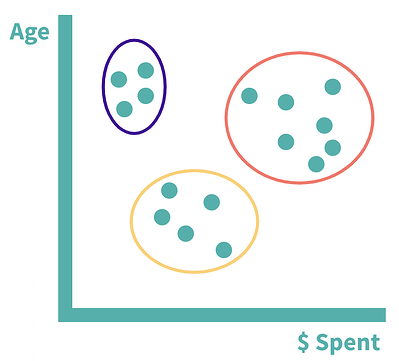

<div class="alert alert-block alert-info">
<b>Reference :</b>  Photo is taken by Dataiku Blog.
</div>

***

 An application example of clustering arises in marketing. We may have access to a large number of measurements (e.g. median household income, occupation, distance from nearest urban area, and so forth) for a large number of people. Our goal is to perform market segmentation by identifying subgroups of people who might be more receptive to a particular form of advertising, or more likely to purchase a particular product. The task of performing market segmentation amounts to clustering the people in the data set.

 Since clustering is popular in many fields, there exist a great number of clustering methods. In this tutorial we focus on perhaps the two best-known clustering approaches: **K-means clustering and hierarchical clustering**. In K-means K-means clustering, we seek to partition the observations into a pre-specified clustering number of clusters. On the other hand, in hierarchical clustering, we do not know in advance how many clusters we want; in fact, we end up with a tree-like visual representation of the observations, called a *dendrogram*, that allows us to view at once the clusterings obtained for each possible number of clusters, from 1 to n. There are advantages and disadvantages
to each of these clustering approaches.

## K-Means Clustering (Theory - Model- Tuning)

### Theory

 **K-means clustering** is a simple and elegant approach for partitioning a data set into K distinct, non-overlapping clusters. To perform K-means clustering, we must first specify the desired number of clusters K; then the K-means algorithm will assign each observation to exactly one of the K clusters.

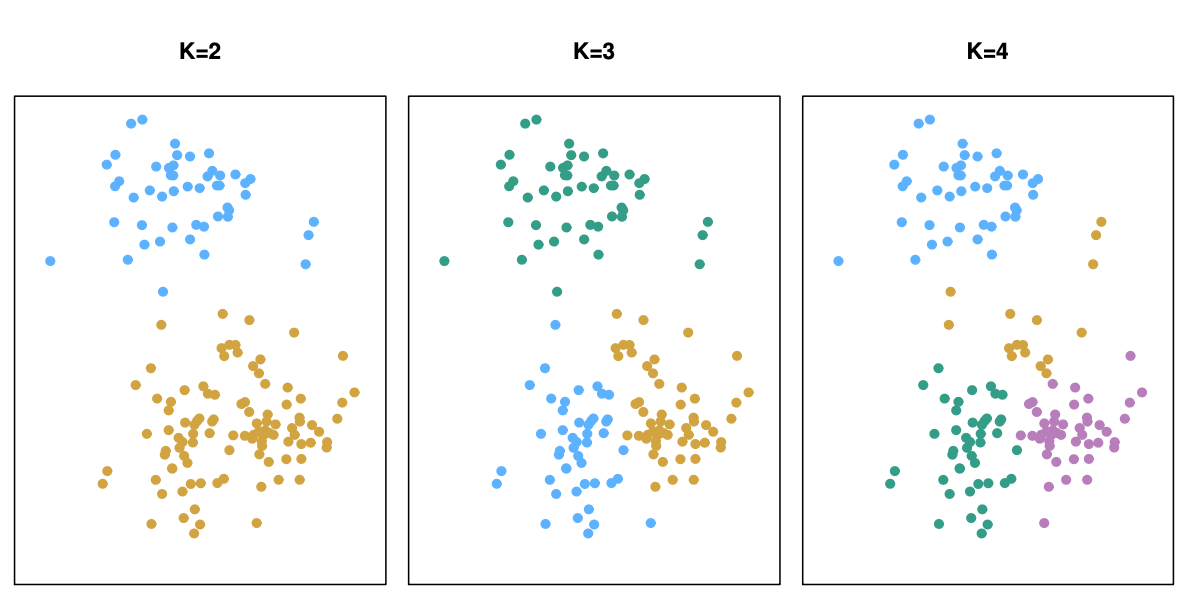

<div class="alert alert-block alert-info">
<b>Reference 1:</b>  Image is taken from *Introduction to Statistical Learning* book.
</div>

***

Figure shows the results obtained from performing K-means clustering on a simulated example consisting of 150 observations in two dimensions, using three different values of K.

The K-means clustering procedure results from a simple and intuitive mathematical problem. We begin by defining some notation. Let C1, . . . , CK denote sets containing the indices of the observations in each cluster. These sets satisfy two properties:

1. C1 ∪ C2 ∪ ... ∪ CK = {1,...,n}. In other words, each observation belongs to at least one of the K clusters.
2. Ck ∩ Ck′ = ∅ for all k ̸= k′. In other words, the clusters are non- overlapping: no observation belongs to more than one cluster.


For instance, if the ith observation is in the kth cluster, then i ∈ Ck. The idea behind K-means clustering is that a good clustering is one for which the **within-cluster variation is as small as possible**. The within-cluster variation for cluster Ck is a measure W (Ck ) of the amount by which the observations within a cluster differ from each other. 

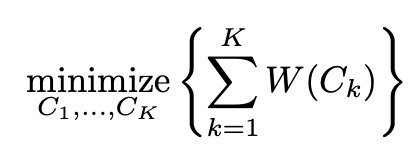

 This formula says that we want to partition the observations into K clusters such that the total within-cluster variation, summed over all K clusters, is as small as possible.
 Solving seems like a reasonable idea, but in order to make it actionable we need to define the within-cluster variation. There are many possible ways to define this concept, but by far the most common choice involves squared *Euclidean distance*. That is, we define;
 
 
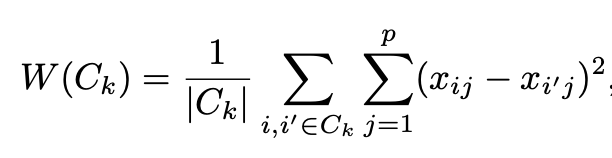

where |Ck| denotes the number of observations in the kth cluster. In other words, the within-cluster variation for the kth cluster is the sum of all of the pairwise squared Euclidean distances between the observations in the kth cluster, divided by the total number of observations in the kth cluster.

 Now, we would like to find an algorithm to solve this equation. This is actually a very difficult problem to solve precisely, since there are almost Kn ways to partition n observations into K clusters.
 
 **K-Means Clustering Algorithm**
 
***

**1.** Randomly assign a number, from 1 to K, to each of the observations.

    These serve as initial cluster assignments for the observations.


**2.** Iterate until the cluster assignments stop changing:

    (a) For each of the K clusters, compute the cluster centroid. The kth cluster centroid is the vector of the p feature means for the observations in the kth cluster.

    (b) Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance).

 Step 2(b), reallocating the observations can only improve. This means that as the algorithm is run, the clustering obtained will continually improve until the result no longer changes; the objective of will never increase. When the result no longer changes, a **local optimum** has been reached.
 
 K-means clustering derives its name from the fact that in Step 2(a), the cluster centroids are computed as the mean of the observations assigned to each cluster.
 
 Because the K-means algorithm finds a local rather than a global optimum, the results obtained will depend on the initial (random) cluster assignment of each observation in Step 1 of Algorithm. For this reason, it is important to run the algorithm multiple times from different random initial configurations. Then one selects the best solution, that for which the objective is smallest.

 As we have seen, to perform K-means clustering, we must decide how many clusters we expect in the data. The problem of selecting K is far from simple. This issue, along with other practical considerations that arise in performing K-means clustering.

***

**How to find optimal number of clusters (K)?**

There are some methods to find optimal number of clusters (K):

**1.** Elbow Curve Method

    The elbow method runs k-means clustering on the dataset for a range of values of k (say 1 to 10). Perform K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points. Then we Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”).


**2.** Silhouette Analysis

    The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).



***

**Distance Measures for Unsupervised Learning**

 Distance measures play an important role in unsupervised learning. Different distance measures must be chosen and used depending on the types of the data. As such, it is important to know how to implement and calculate a range of different popular distance measures and the intuitions for the resulting scores.

 A distance measure is an objective score that summarizes the relative difference between two objects in a problem domain. Most commonly, the two objects are rows of data that describe a subject (such as a person, car, or house), or an event (such as a purchase, a claim, or a diagnosis).

 Most commonly used distance measures in unsupervised learning are as follows:

- **Hamming Distance**

    Hamming distance calculates the distance between two binary vectors, also referred to as binary strings or bitstrings for short.


- **Euclidean Distance**

    Euclidean distance calculates the distance between two real-valued vectors.


- **Manhattan Distance**

    The Manhattan distance, also called the Taxicab distance or the City Block distance, calculates the distance between two real-valued vectors.


- **Minkowski Distance**

    Minkowski distance calculates the distance between two real-valued vectors.
    
<div class="alert alert-block alert-success">
<b>Do you want to learn details?:</b> If you want to learn more, please check the post of Machine Learning Mastery.  
</div>

[Take me to the post](https://machinelearningmastery.com/distance-measures-for-machine-learning/)

### Exploratory Data Analysis - Preprocessing

For a real world example, we will use *Bank Marketing Data Set* dataset. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

It can be downloaded from [here](https://www.kaggle.com/berkayalan/bank-marketing-data-set).

We will understand the dataset first.

In [90]:
df = pd.read_csv("../input/bank-marketing-data-set/bank_marketing_dataset.csv")

In [91]:
df.shape

(41188, 21)

In [92]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


First, let's try to undertand age distribution of customers.

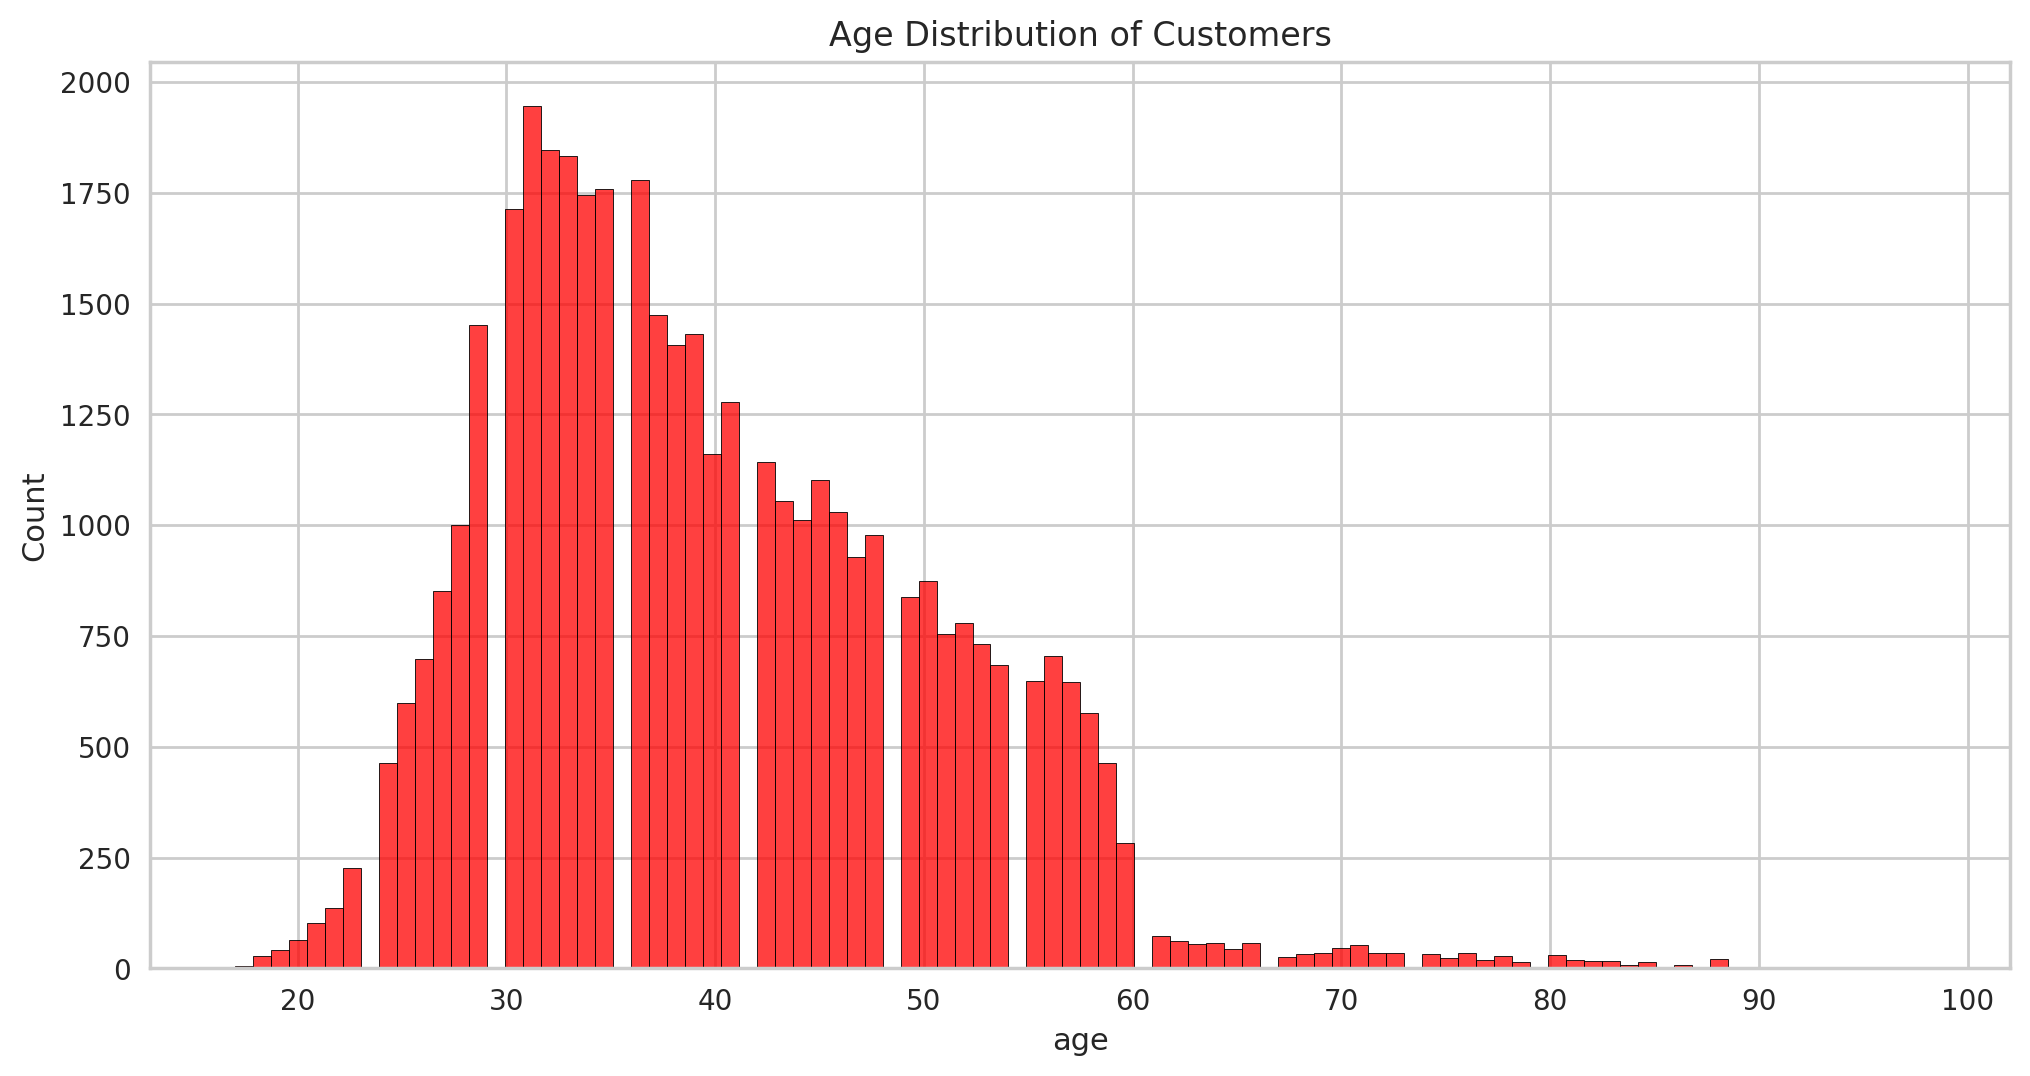

In [94]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x="age",color="red")
plt.title("Age Distribution of Customers")
plt.show()

We also want to see if there is between ages and loan status of customers.

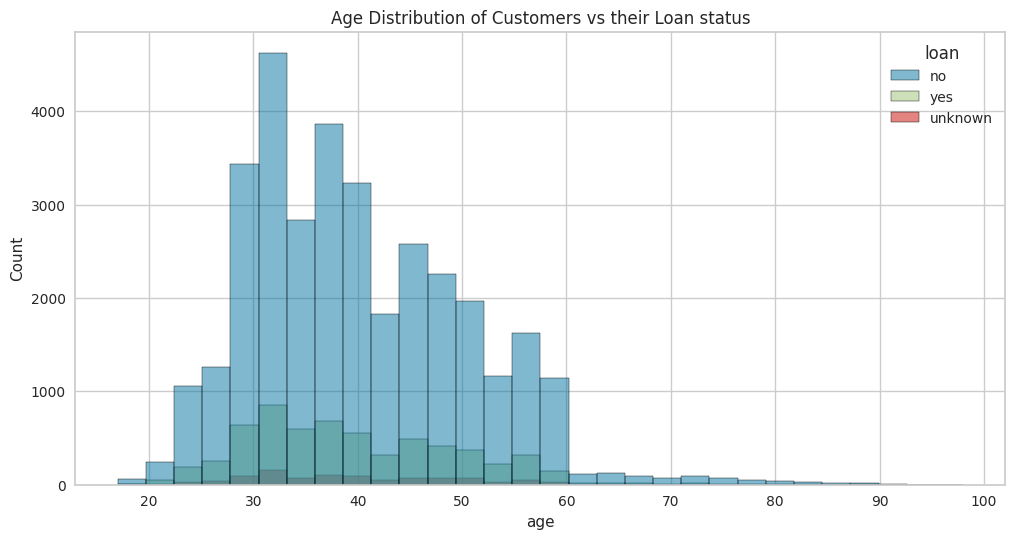

In [95]:
plt.figure(figsize=(12,6),dpi=100)
sns.histplot(data=df,x="age",hue="loan",bins=30)
plt.title("Age Distribution of Customers vs their Loan status")
plt.show()

Now we will try to undertand marital status distribution of customers.

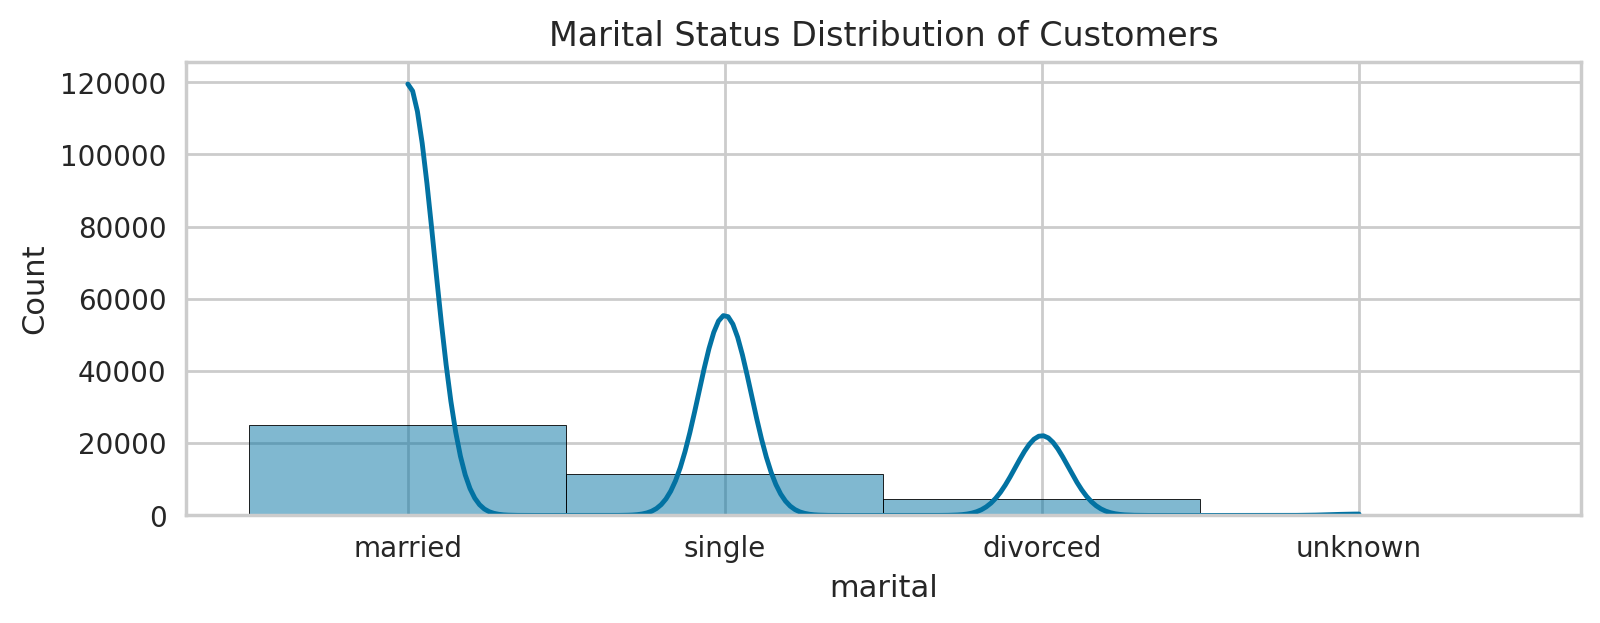

In [96]:
plt.figure(figsize=(9,3),dpi=200)
sns.histplot(data=df,x="marital",kde=True)
plt.title("Marital Status Distribution of Customers")
plt.show()

pdays column means number of days that passed by after the client was last contacted from a previous campaign. 999 means client was not previously contacted. We will look at that.

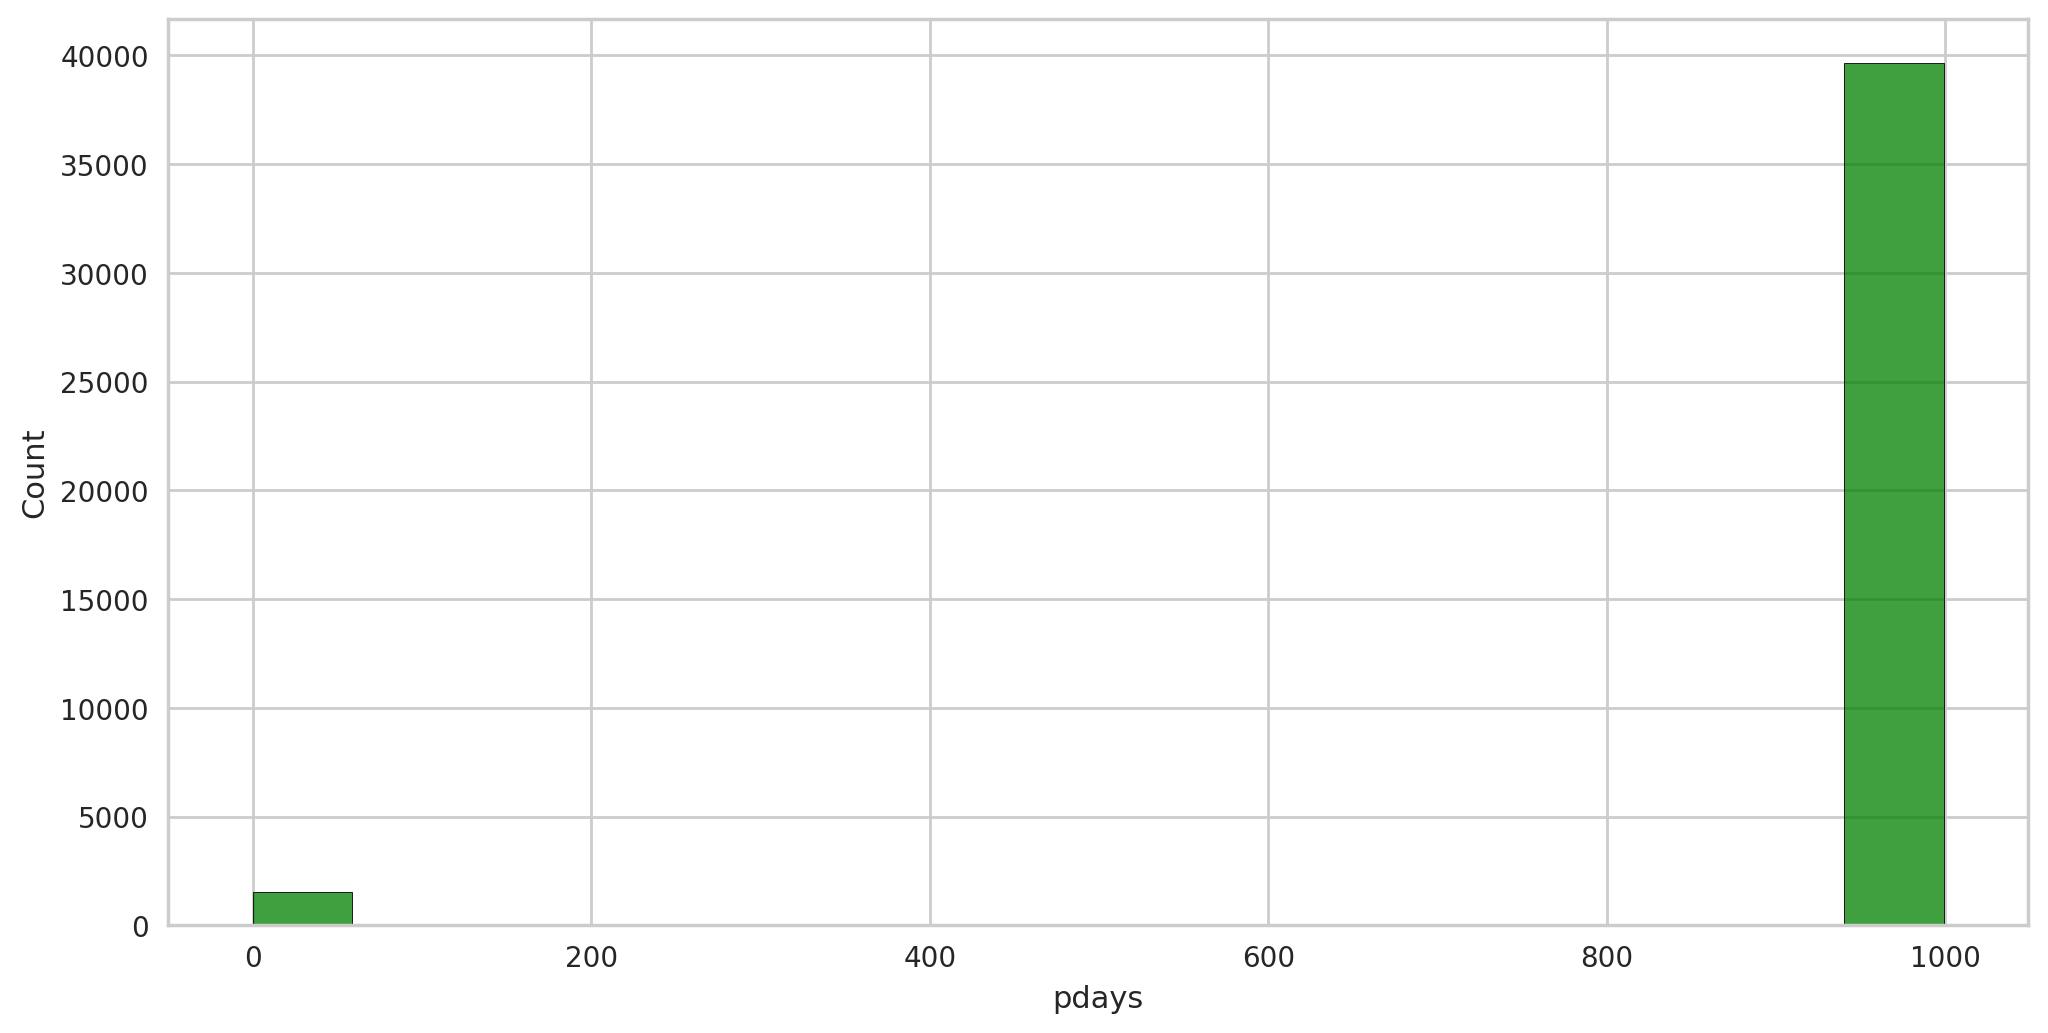

In [97]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x="pdays",color="green")
plt.show()

In [98]:
pd.DataFrame(df.pdays.value_counts()).head()

,pdays
999,39673
3,439
6,412
4,118
9,64


As we can see, there are many clients that was not previously contacted. Now we will look only contacted clients.

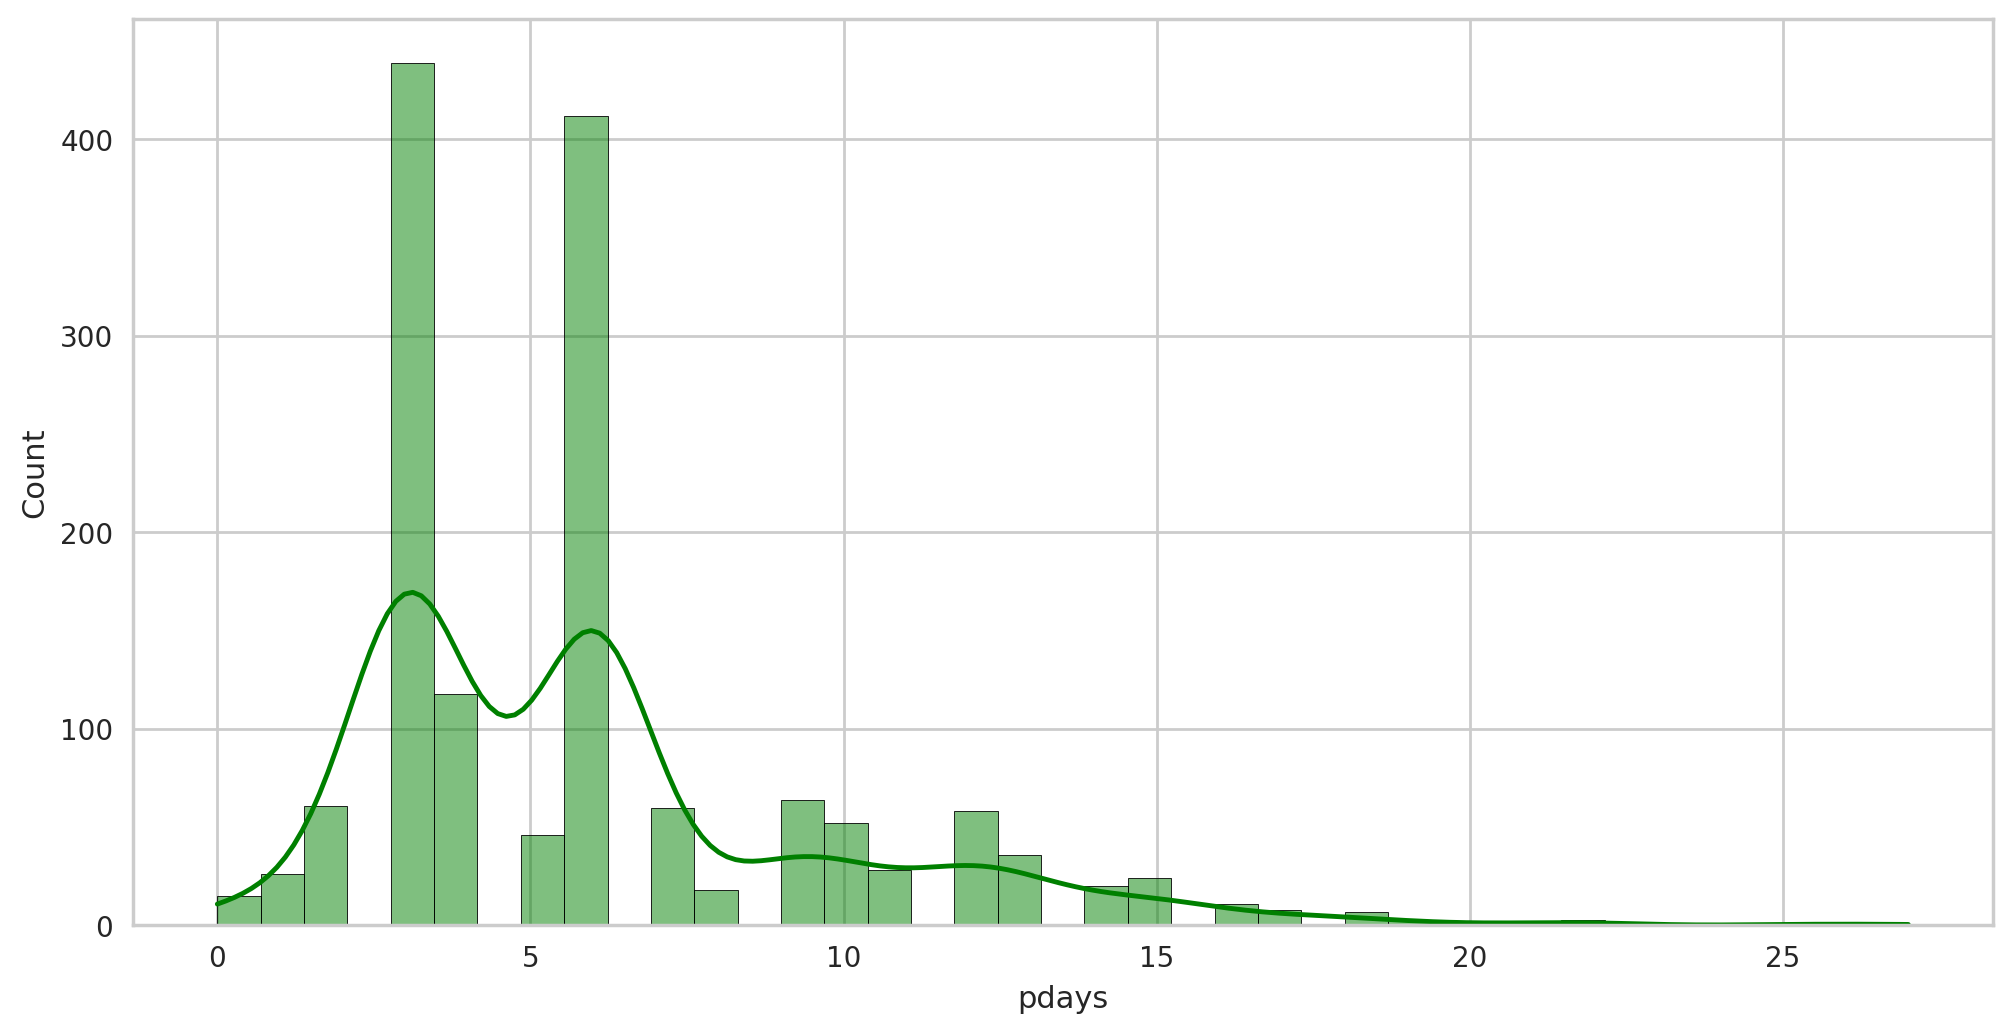

In [99]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df.pdays!=999],x="pdays",color="green",kde=True)
plt.show()

Now we will look distribution of durations based on contact type.

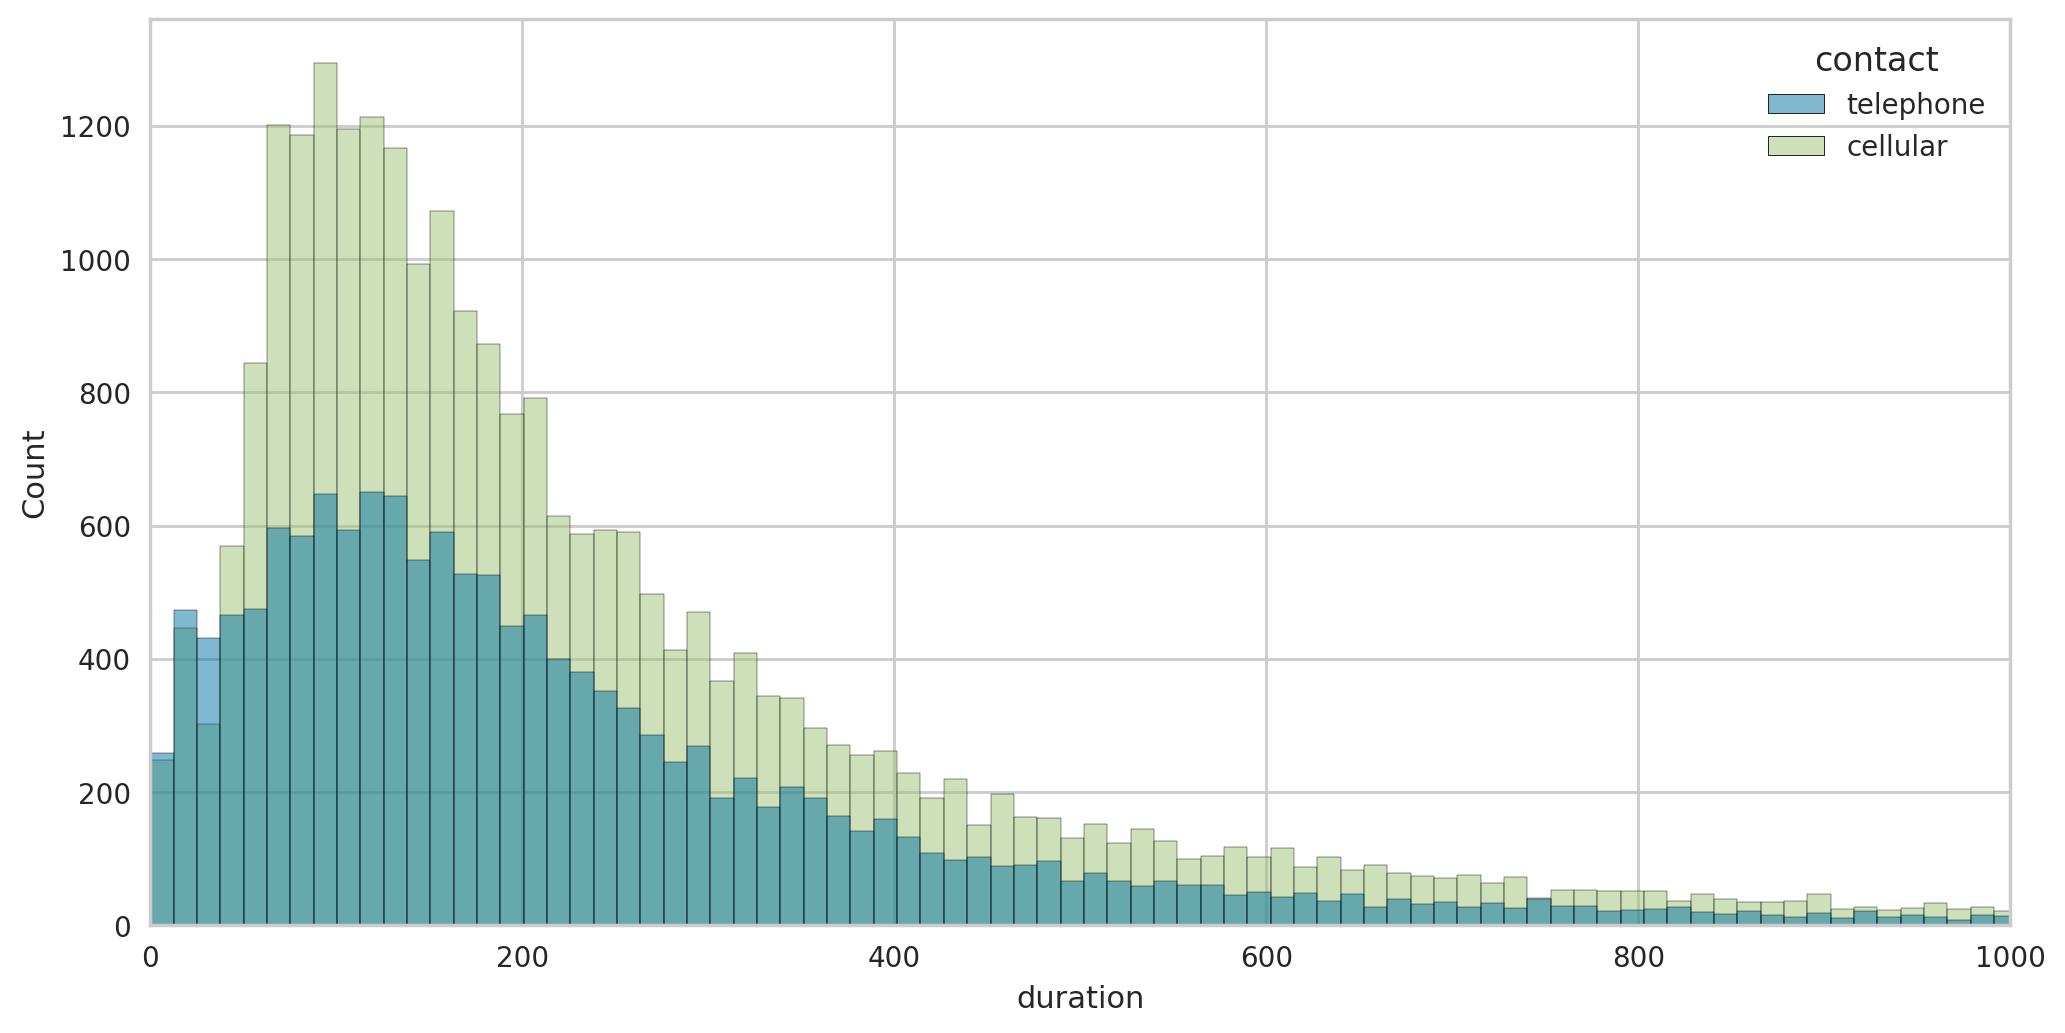

In [100]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x="duration",hue="contact",color="purple")
plt.xlim(0,1000)
plt.show()

Now we will look loan status of customers.

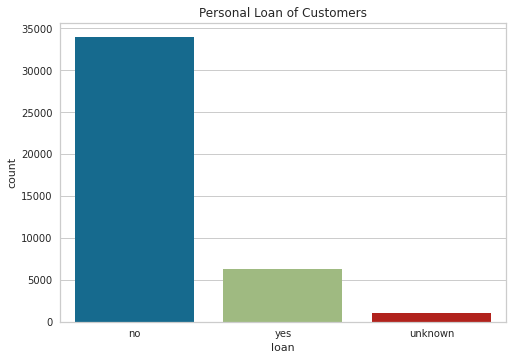

In [101]:
sns.countplot(data=df,x="loan")
plt.title("Personal Loan of Customers")
plt.show()

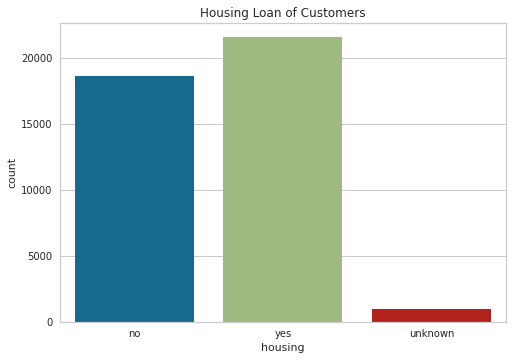

In [102]:
sns.countplot(data=df,x="housing")
plt.title("Housing Loan of Customers")
plt.show()

Now we will look jobs of customers.

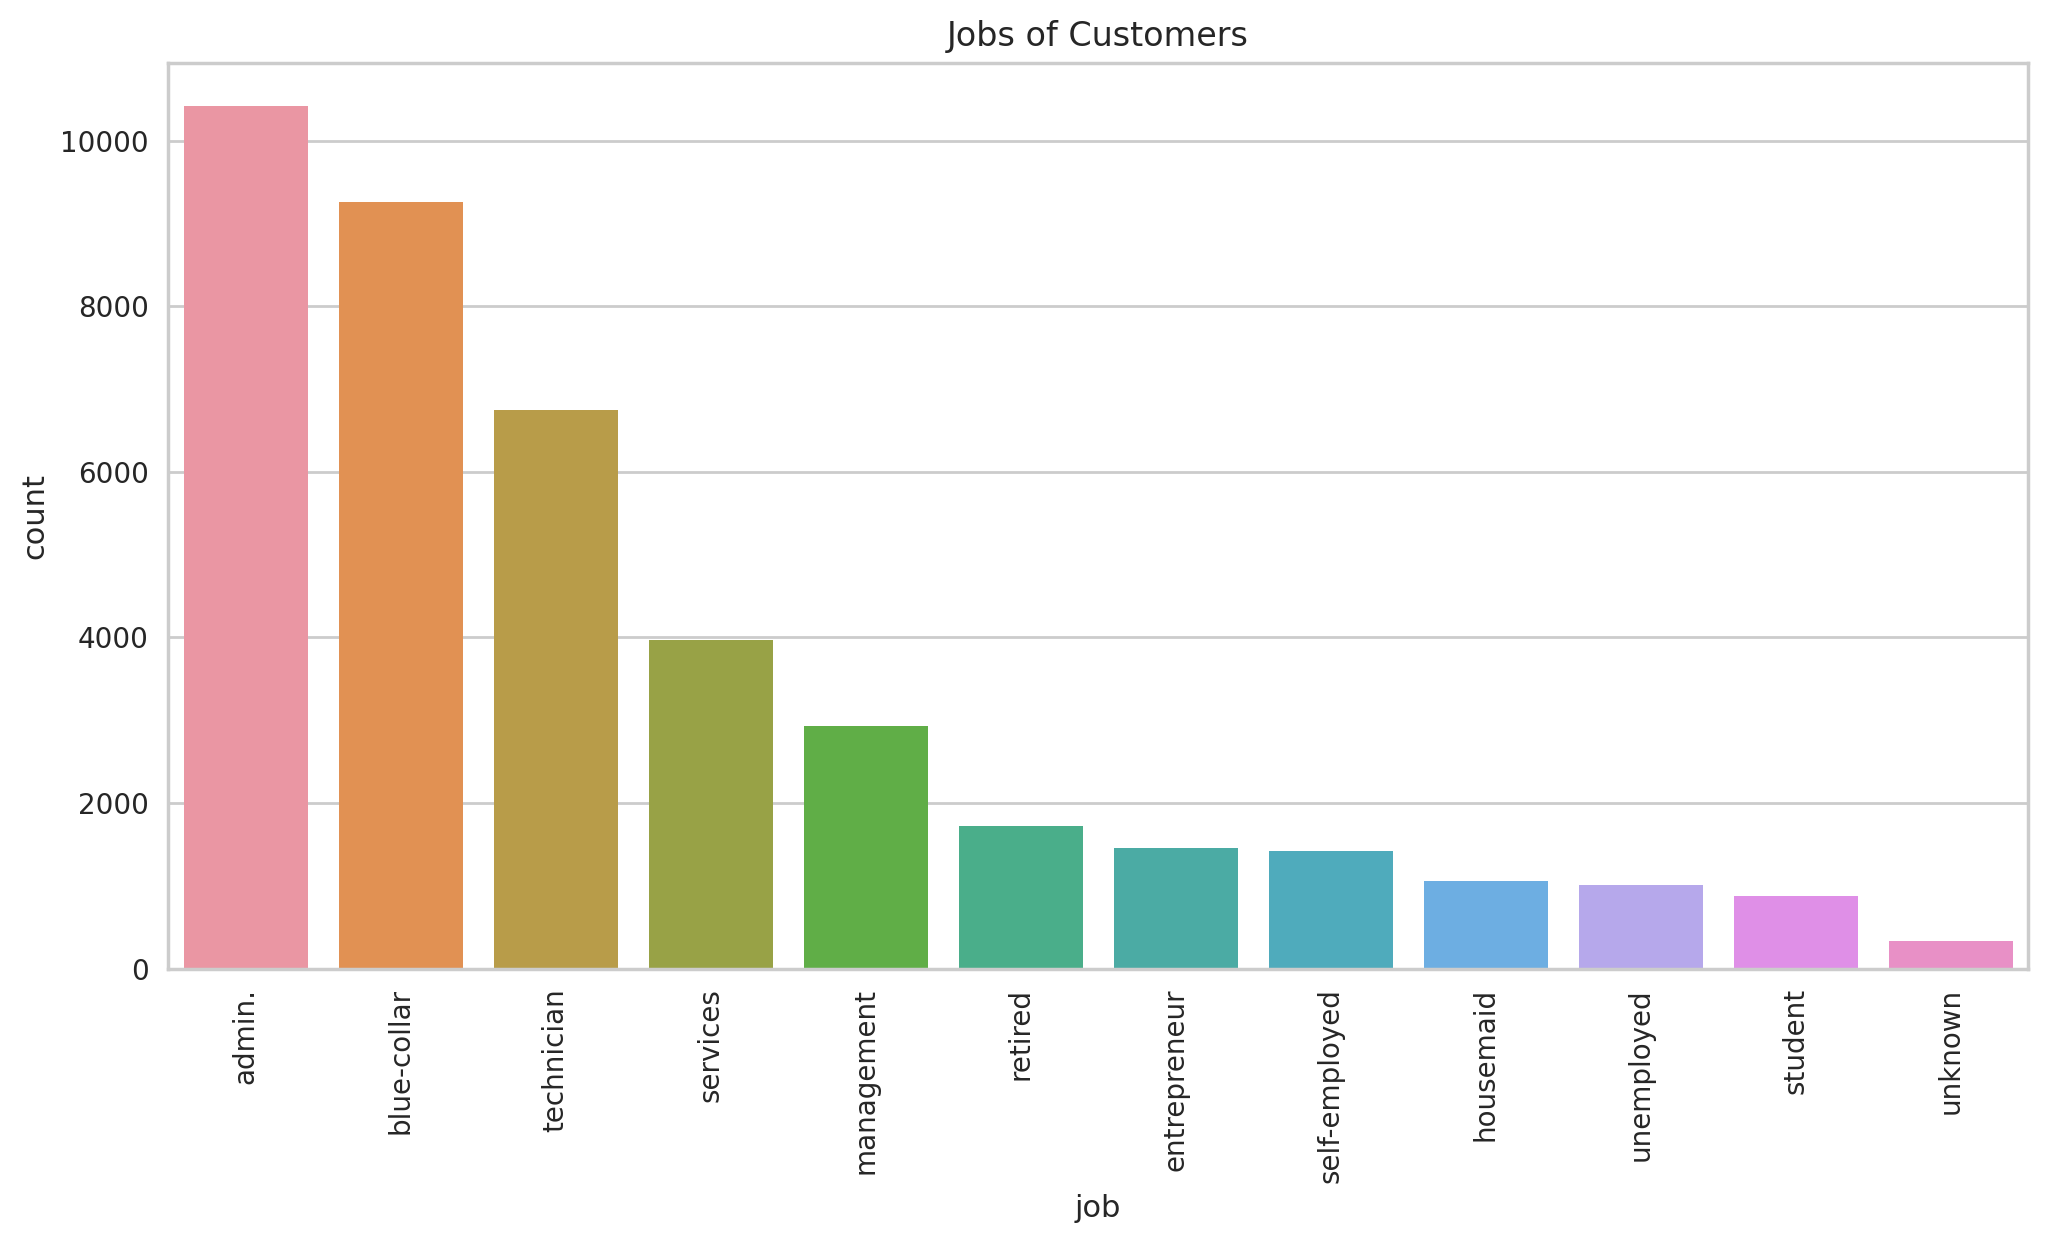

In [103]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x="job",order=df.job.value_counts().index)
plt.title("Jobs of Customers")
plt.xticks(rotation=90)
plt.show()

Now we will look education of customers.

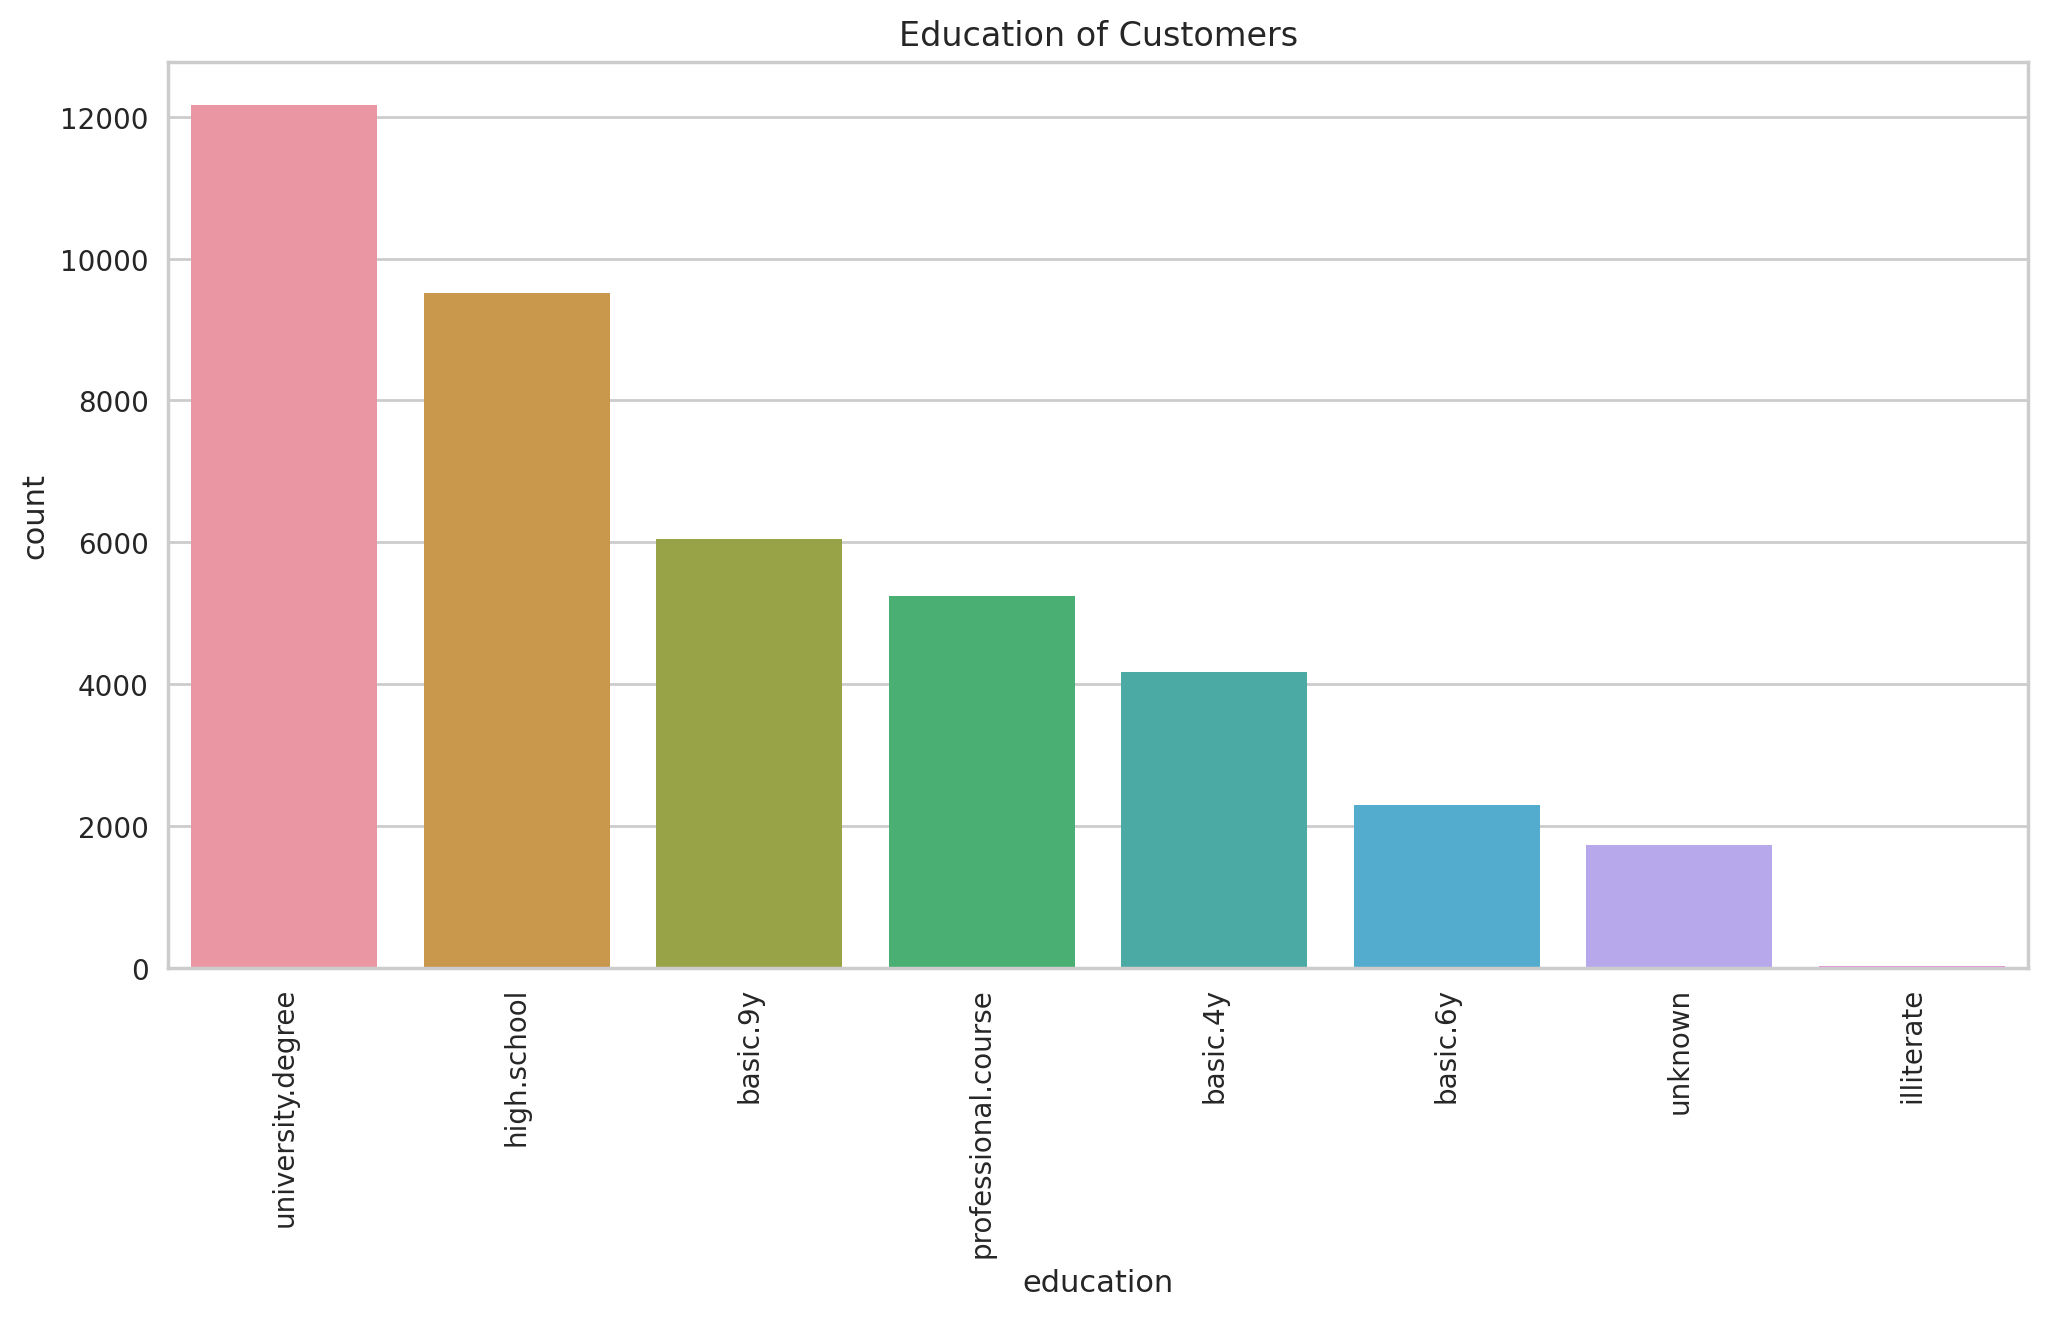

In [104]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x="education",order=df.education.value_counts().index)
plt.title("Education of Customers")
plt.xticks(rotation=90)
plt.show()

In [105]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


***

 In order to calculate distances for K-Means cluestering, all features must be in numeric format. To solve this issue, we will apply **dummy method**.

In [106]:
df.shape

(41188, 21)

In [107]:
df_dummies = pd.get_dummies(df)

In [108]:
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [109]:
df_dummies.shape

(41188, 65)

As we can see, it created new column for each category of each feature.

Because we are dealing with distance metric,we will apply **scaling**.

In [110]:
scaler = StandardScaler()

In [111]:
df_scaled = scaler.fit_transform(df_dummies)

In [112]:
df_scaled[0]

array([ 1.53303429,  0.01047142, -0.56592197,  0.1954139 , -0.34949428,
        0.64809227,  0.72272247,  0.88644656,  0.71245988,  0.33167991,
       -0.58202282, -0.53831699, -0.19143021,  6.15277204, -0.2764353 ,
       -0.2087573 , -0.18903213, -0.3265564 , -0.1473267 , -0.44244927,
       -0.15887166, -0.08987076, -0.35509663,  0.80763764, -0.62493754,
       -0.04411455,  2.97708361, -0.24274754, -0.41474269, -0.54809999,
       -0.0209096 , -0.38191849, -0.64753149, -0.20945296,  0.51371278,
       -0.51359953, -0.00853476,  1.10081447, -0.1569334 , -1.04887691,
        0.46173139, -0.1569334 , -0.42287213, -1.31826996,  1.31826996,
       -0.26127446, -0.42007603, -0.06662113, -0.45925282, -0.38504233,
       -0.11590677,  1.41115463, -0.33253245, -0.13319736, -0.11846175,
       -0.484371  ,  1.95899952, -0.51458089, -0.49439422, -0.4960667 ,
       -0.3392905 ,  0.39770593, -0.1857    ,  0.35630932, -0.35630932])

### Model

In [113]:
df_scaled[0]

array([ 1.53303429,  0.01047142, -0.56592197,  0.1954139 , -0.34949428,
        0.64809227,  0.72272247,  0.88644656,  0.71245988,  0.33167991,
       -0.58202282, -0.53831699, -0.19143021,  6.15277204, -0.2764353 ,
       -0.2087573 , -0.18903213, -0.3265564 , -0.1473267 , -0.44244927,
       -0.15887166, -0.08987076, -0.35509663,  0.80763764, -0.62493754,
       -0.04411455,  2.97708361, -0.24274754, -0.41474269, -0.54809999,
       -0.0209096 , -0.38191849, -0.64753149, -0.20945296,  0.51371278,
       -0.51359953, -0.00853476,  1.10081447, -0.1569334 , -1.04887691,
        0.46173139, -0.1569334 , -0.42287213, -1.31826996,  1.31826996,
       -0.26127446, -0.42007603, -0.06662113, -0.45925282, -0.38504233,
       -0.11590677,  1.41115463, -0.33253245, -0.13319736, -0.11846175,
       -0.484371  ,  1.95899952, -0.51458089, -0.49439422, -0.4960667 ,
       -0.3392905 ,  0.39770593, -0.1857    ,  0.35630932, -0.35630932])

In [114]:
k_means_model = KMeans(n_clusters=2) #n_clusters is K value.

In [115]:
k_means_model.fit(df_scaled)

KMeans(n_clusters=2)

In [116]:
cluster_labels = k_means_model.predict(df_scaled) #we can also do that with fit_predict() method.

In [117]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

Now we will merge cluster labels with our main data set.

In [118]:
df_dummies["Cluster"] = cluster_labels

In [119]:
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1


Now we can look at correlations of each feature with clusters that we assigned.

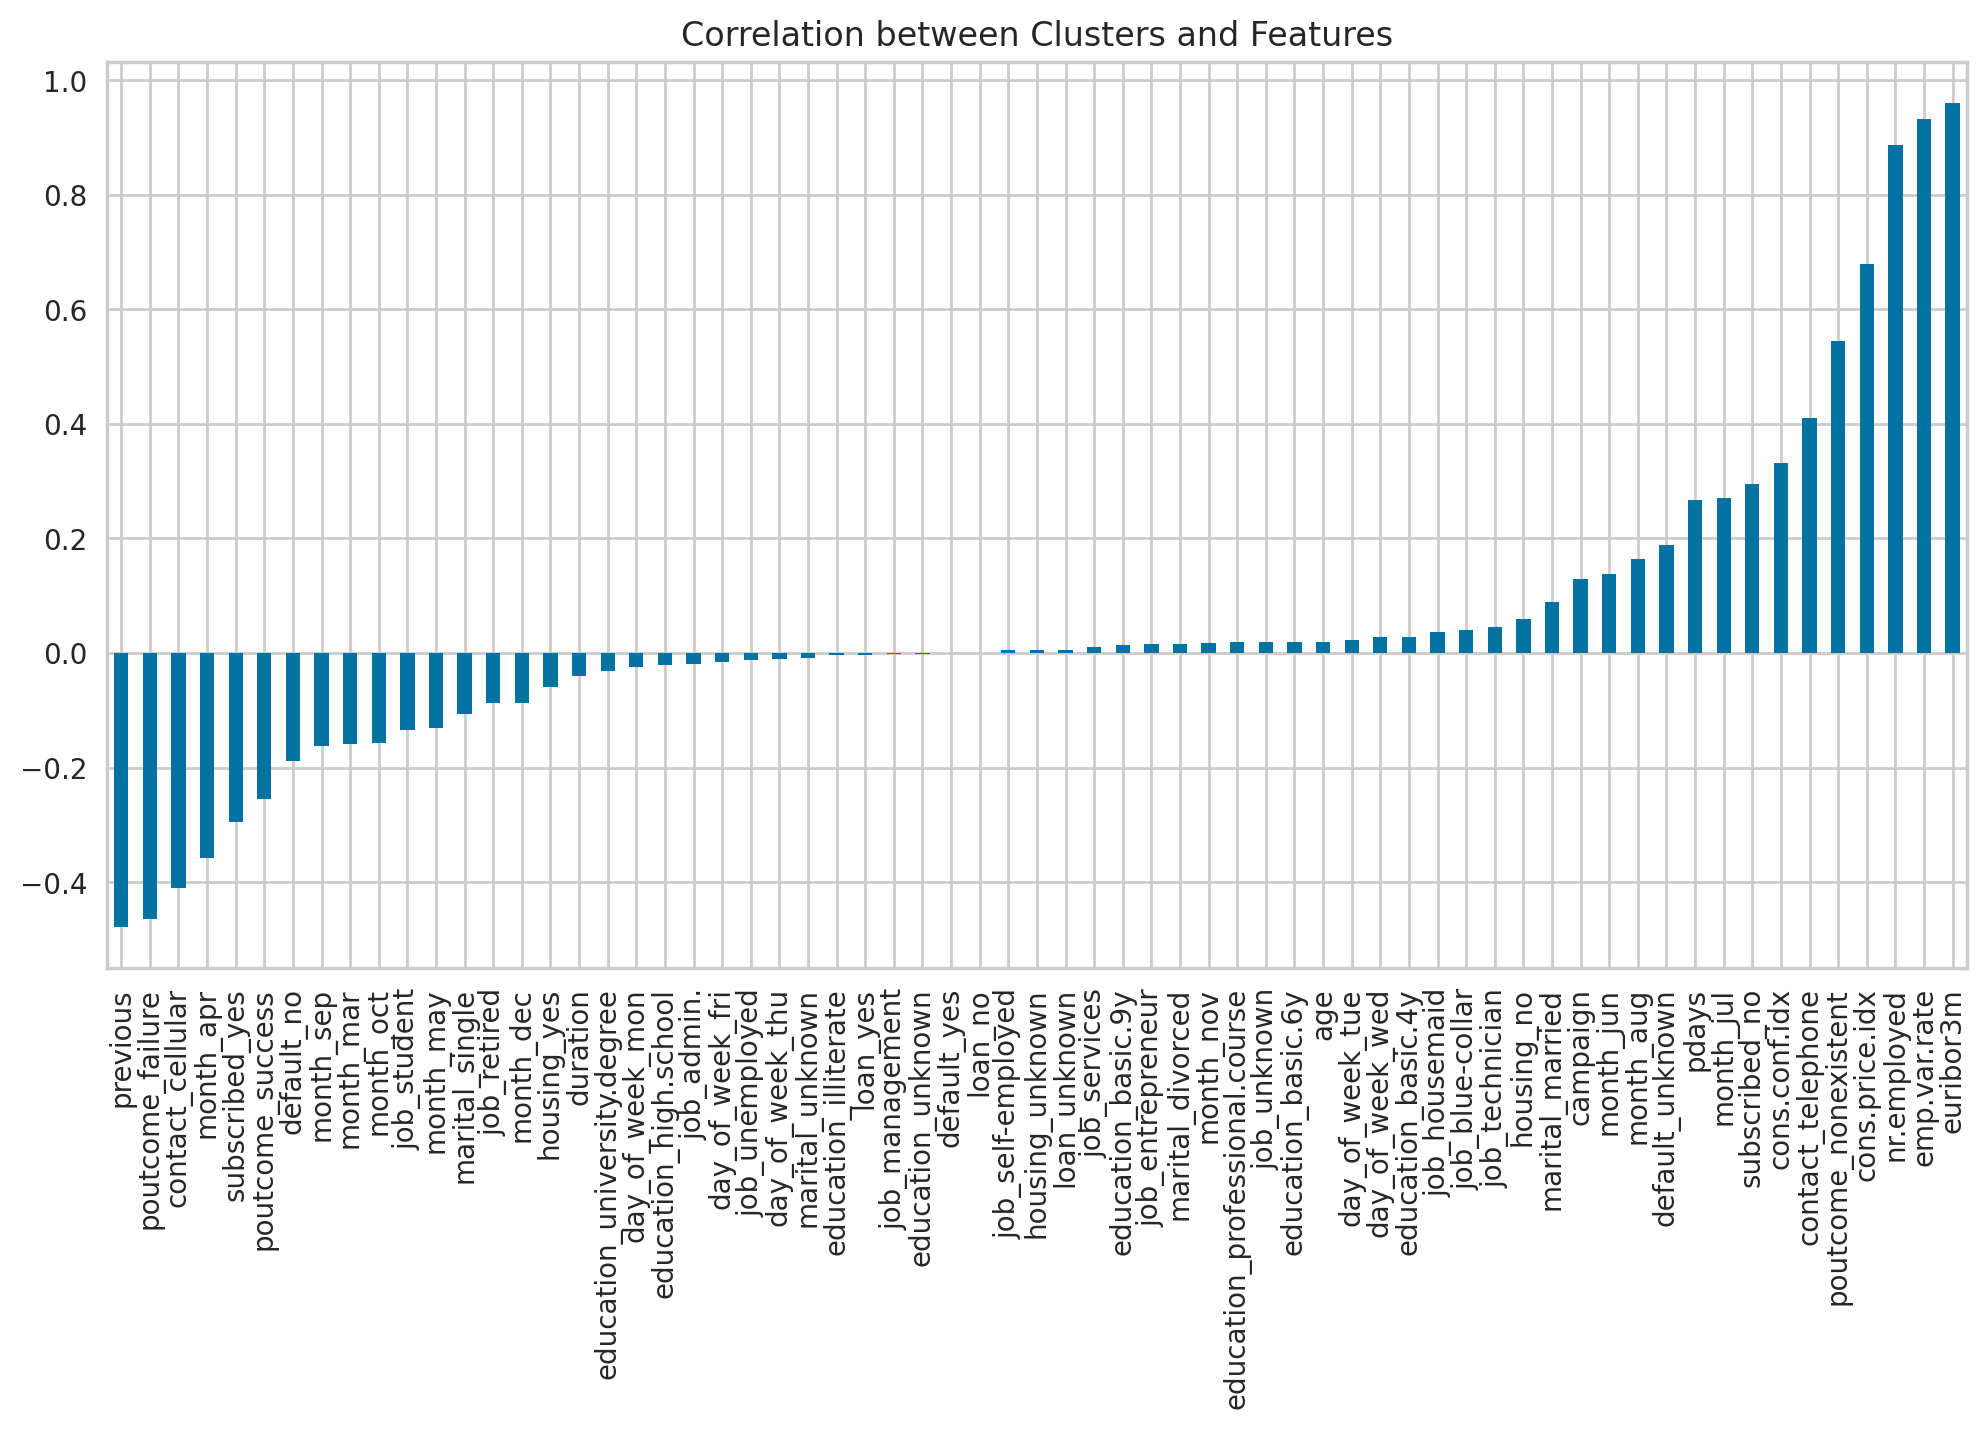

In [120]:
plt.figure(figsize=(12,6),dpi=200)
df_dummies.corr()["Cluster"].iloc[:-1].sort_values().plot(kind="bar")
plt.title("Correlation between Clusters and Features")
plt.show()

***

**How to find optimal number of clusters (K)?**

There are some methods to find optimal number of clusters (K):

**1. Elbow Curve Method**

The elbow method runs k-means clustering on the dataset for a range of values of k (say 1 to 10). Perform K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points. Then we Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”). We want high similarity(Max) inside clusters and low similarity interclusters(Min) to find optimized sum of squared distance(SSD).

In [121]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(df_dummies)
    
    ssd.append(model.inertia_) ## SSD Point to cluster centers

In [122]:
ssd

[2735461965.6357017,
 1321035049.6208167,
 851056316.7920729,
 642597940.0182775,
 531577661.06191915,
 440296673.9597612,
 376953857.9418616,
 326251320.34816784]

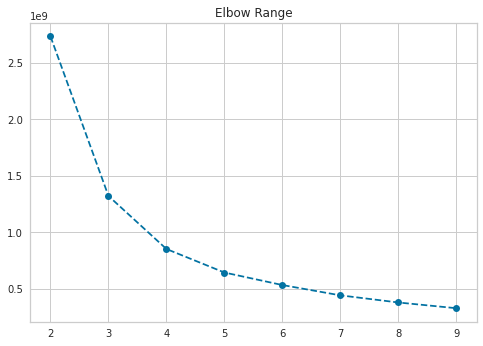

In [123]:
plt.plot(range(2,10),ssd,"o--")
plt.title("Elbow Range")
plt.show()

In [124]:
pd.Series(ssd).diff()

0             NaN
1   -1.414427e+09
2   -4.699787e+08
3   -2.084584e+08
4   -1.110203e+08
5   -9.128099e+07
6   -6.334282e+07
7   -5.070254e+07
dtype: float64

## Hierarchical Clustering (Theory - Model)

### Theory

 One potential disadvantage of K-means clustering is that it requires us to pre-specify the number of clusters K. **Hierarchical clustering** is an alternative approach which does not require that we commit to a particular choice of K. Hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based representation of the observations, called a *dendrogram*.

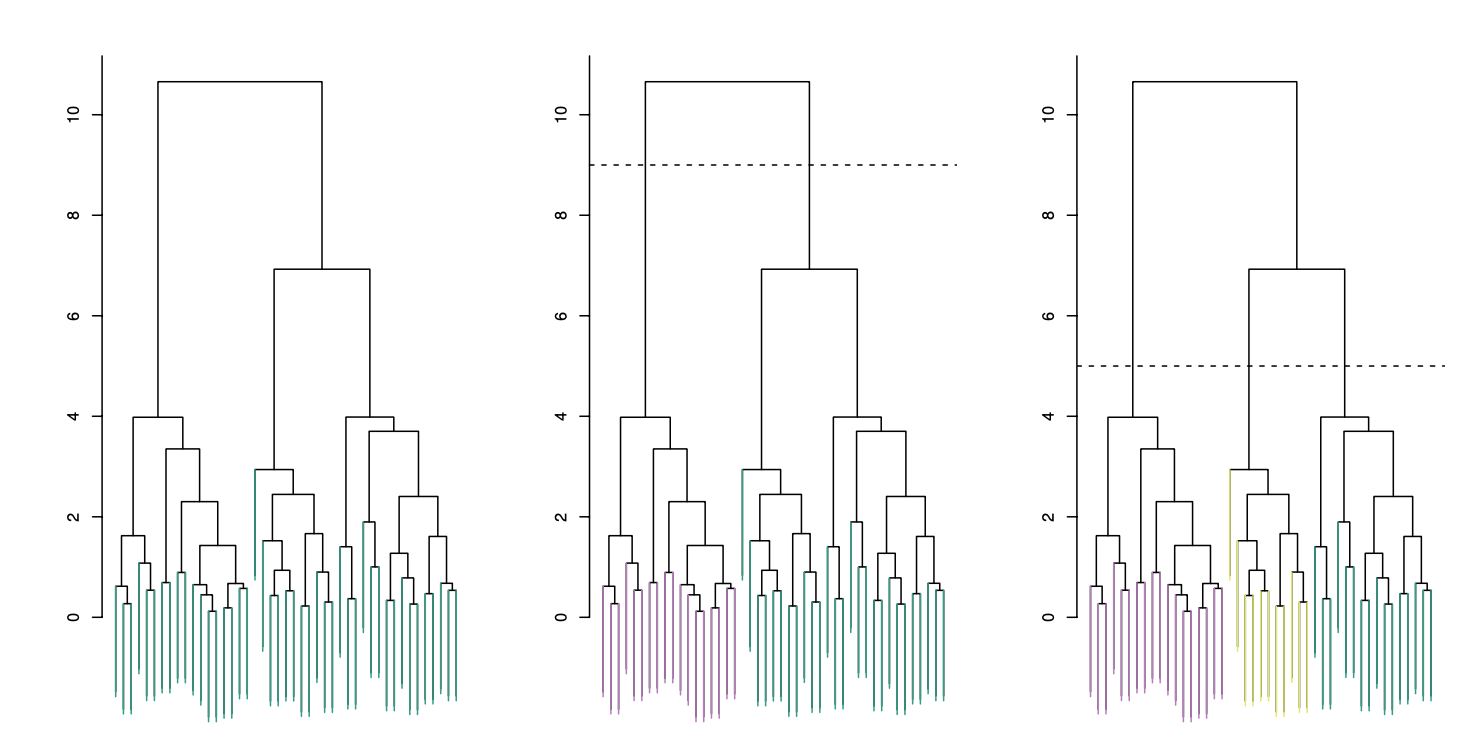

<div class="alert alert-block alert-info">
<b>Reference 3:</b>  Image is taken from *Introduction to Statistical Learning* book.
</div>

***

**Types of Hierarchical Clustering**

1. Agglomerative Clustering: Also known as bottom-up approach or hierarchical agglomerative clustering (HAC). A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. Bottom-up algorithms treat **each data as a singleton cluster at the outset and then successively agglomerates pairs of clusters until all clusters have been merged into a single cluster that contains all data**. 

2. Divisive clustering: Also known as top-down approach. This algorithm also does not require to prespecify the number of clusters. Top-down clustering requires a method for **splitting a cluster that contains the whole data and proceeds by splitting clusters recursively until individual data have been splitted into singleton cluster**.

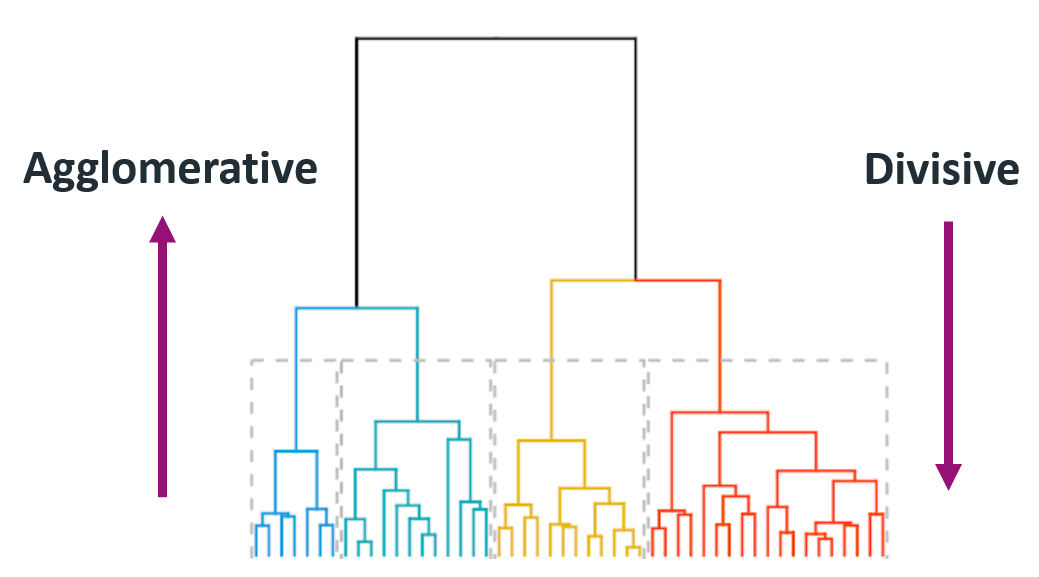

<div class="alert alert-block alert-info">
<b>Reference 2:</b>  Image is taken from *Great Learning* website.
</div>

 Each leaf of the dendrogram represents one of the observations in a data set. As we move up the tree, some leaves begin to fuse into branches. These correspond to observations that are *similar to each other*. As we move higher up the tree, branches themselves fuse, either with leaves or other branches. The earlier (lower in the tree) fusions occur, the more similar the groups of observations are to each other. On the other hand, observations that fuse later (near the top of the tree) can be quite different.

 Thus, observations that fuse at the very bottom of the tree are quite similar to each other, whereas observations that fuse close to the top of the tree will tend to be quite different. Y axis shows the distance.

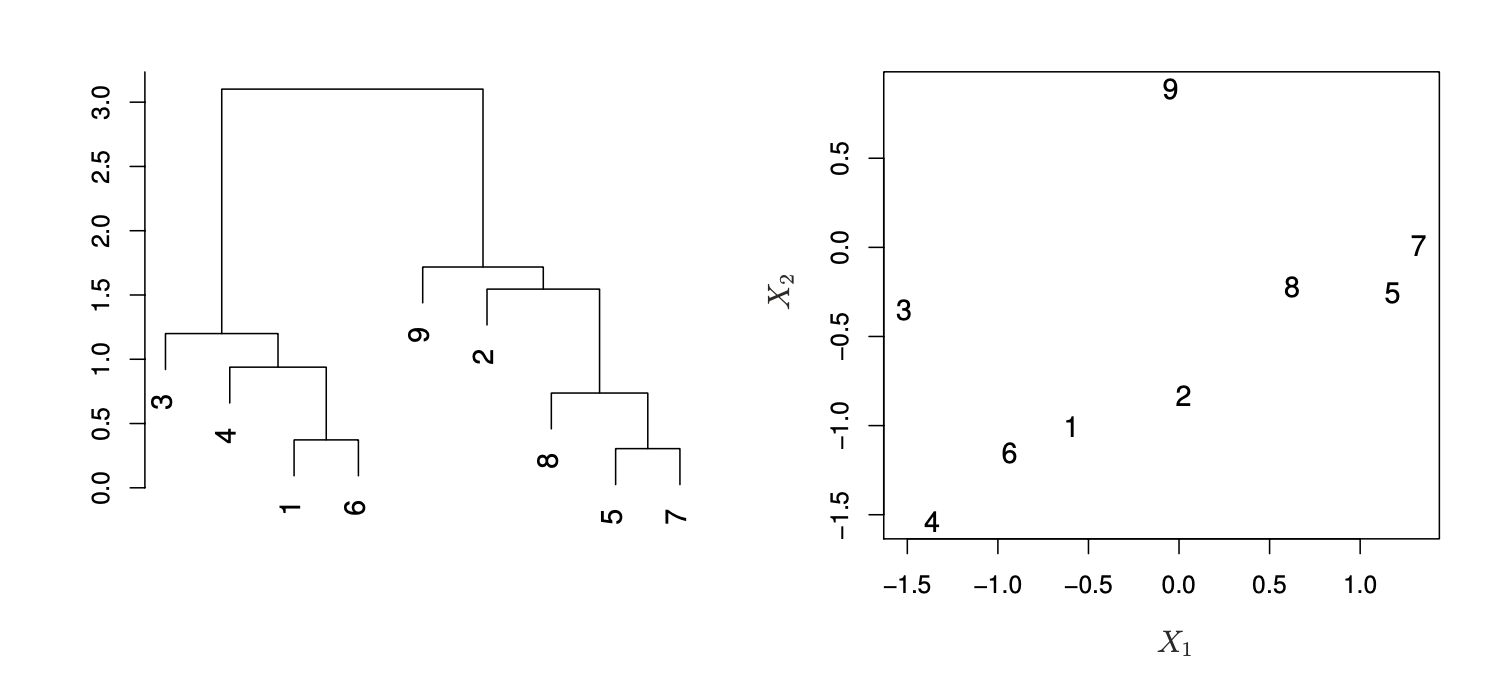

<div class="alert alert-block alert-info">
<b>Reference 4:</b>  Image is taken from *Introduction to Statistical Learning* book.
</div>

Left: a dendrogram generated using Euclidean distance and complete linkage. Observations 5 and 7 are quite similar to each other, as are observations 1 and 6. However, observation 9 is no more similar to observation 2 than it is to observations 8, 5, and 7, even though observations 9 and 2 are close together in terms of horizontal distance. This is because observations 2,8,5, and 7 all fuse with observation 9 at the same height, approximately 1.8. 

Right: the raw data used to generate the dendrogram can be used to confirm that indeed, observation 9 is no more similar to observation 2 than it is to observations 8, 5, and 7.

***

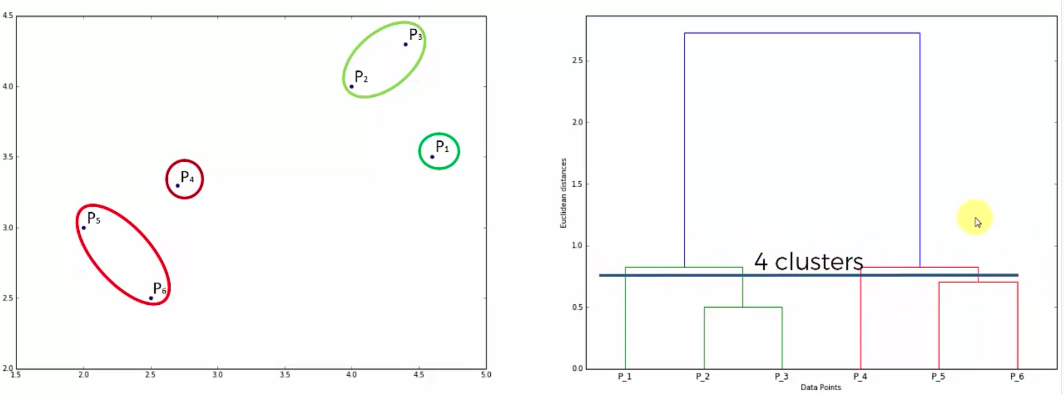

<div class="alert alert-block alert-info">
<b>Reference 5:</b>  Image is taken from *Machine Learning A-Z™: Hands-On Python & R In Data Science* course.
</div>

**Note:** To put it mathematically, there are *2^(n−1)* possible reorderings of the dendrogram, where n is the number of leaves. This is because at each of the n − 1 points where fusions occur, the positions of the two fused branches could be swapped without affecting the meaning of the dendrogram. Therefore, we cannot draw conclusions about the similarity of two observations based on their proximity along the horizontal axis.

 Now, we would like to find an algorithm to solve this equation. 
 
 **Hierarchical Clustering Algorithm**
 
***

1. Compare data points to find most similar data points to each other.

2. Merge these to create a cluster.

3. Compare clusters to find most similar clusters and merge again.

4. Repeat until all data points in a single cluster.

### Model

For a real world example, we will use *Auto-mpg dataset* dataset. The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository.

It can be downloaded from [here](https://www.kaggle.com/uciml/autompg-dataset).

We will understand the dataset first.

In [125]:
df = pd.read_csv("../input/autompg-dataset/auto-mpg.csv")

In [126]:
df.shape

(398, 9)

In [127]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [128]:
df.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [129]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


***

 In order to calculate distances for hierarchical cluestering, all features must be in numeric format. *Origin* column is in categorical format. To solve this issue, we will apply **dummy method**.

In [130]:
df_with_dummies = pd.get_dummies(df.drop("car name",axis=1))

In [131]:
df_with_dummies.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower_100,horsepower_102,horsepower_103,horsepower_105,horsepower_107,horsepower_108,horsepower_110,horsepower_112,horsepower_113,horsepower_115,horsepower_116,horsepower_120,horsepower_122,horsepower_125,horsepower_129,horsepower_130,horsepower_132,horsepower_133,horsepower_135,horsepower_137,horsepower_138,horsepower_139,horsepower_140,horsepower_142,horsepower_145,horsepower_148,horsepower_149,horsepower_150,horsepower_152,horsepower_153,horsepower_155,horsepower_158,horsepower_160,horsepower_165,horsepower_167,horsepower_170,horsepower_175,horsepower_180,horsepower_190,horsepower_193,horsepower_198,horsepower_200,horsepower_208,horsepower_210,horsepower_215,horsepower_220,horsepower_225,horsepower_230,horsepower_46,horsepower_48,horsepower_49,horsepower_52,horsepower_53,horsepower_54,horsepower_58,horsepower_60,horsepower_61,horsepower_62,horsepower_63,horsepower_64,horsepower_65,horsepower_66,horsepower_67,horsepower_68,horsepower_69,horsepower_70,horsepower_71,horsepower_72,horsepower_74,horsepower_75,horsepower_76,horsepower_77,horsepower_78,horsepower_79,horsepower_80,horsepower_81,horsepower_82,horsepower_83,horsepower_84,horsepower_85,horsepower_86,horsepower_87,horsepower_88,horsepower_89,horsepower_90,horsepower_91,horsepower_92,horsepower_93,horsepower_94,horsepower_95,horsepower_96,horsepower_97,horsepower_98,horsepower_?
0,18.0,8,307.0,3504,12.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,3693,11.5,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,3436,11.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,3433,12.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,3449,10.5,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As we can see, it created new column for each category of each feature.

Because we are dealing with distance metric,we will apply **Min Max scaling**. It transforms everything to scale between 0 and 1.

In [132]:
scaler = MinMaxScaler()

In [133]:
df_scaled = scaler.fit_transform(df_with_dummies)

In [134]:
df_scaled[:5]

array([[0.2393617 , 1.        , 0.61757106, 0.5361497 , 0.23809524,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [135]:
df_scaled  = pd.DataFrame(df_scaled,columns=df_with_dummies.columns)

In [136]:
df_scaled.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower_100,horsepower_102,horsepower_103,horsepower_105,horsepower_107,horsepower_108,horsepower_110,horsepower_112,horsepower_113,horsepower_115,horsepower_116,horsepower_120,horsepower_122,horsepower_125,horsepower_129,horsepower_130,horsepower_132,horsepower_133,horsepower_135,horsepower_137,horsepower_138,horsepower_139,horsepower_140,horsepower_142,horsepower_145,horsepower_148,horsepower_149,horsepower_150,horsepower_152,horsepower_153,horsepower_155,horsepower_158,horsepower_160,horsepower_165,horsepower_167,horsepower_170,horsepower_175,horsepower_180,horsepower_190,horsepower_193,horsepower_198,horsepower_200,horsepower_208,horsepower_210,horsepower_215,horsepower_220,horsepower_225,horsepower_230,horsepower_46,horsepower_48,horsepower_49,horsepower_52,horsepower_53,horsepower_54,horsepower_58,horsepower_60,horsepower_61,horsepower_62,horsepower_63,horsepower_64,horsepower_65,horsepower_66,horsepower_67,horsepower_68,horsepower_69,horsepower_70,horsepower_71,horsepower_72,horsepower_74,horsepower_75,horsepower_76,horsepower_77,horsepower_78,horsepower_79,horsepower_80,horsepower_81,horsepower_82,horsepower_83,horsepower_84,horsepower_85,horsepower_86,horsepower_87,horsepower_88,horsepower_89,horsepower_90,horsepower_91,horsepower_92,horsepower_93,horsepower_94,horsepower_95,horsepower_96,horsepower_97,horsepower_98,horsepower_?
0,0.239362,1.0,0.617571,0.536150,0.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.159574,1.0,0.728682,0.589736,0.208333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.239362,1.0,0.645995,0.516870,0.178571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.186170,1.0,0.609819,0.516019,0.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.212766,1.0,0.604651,0.520556,0.148810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


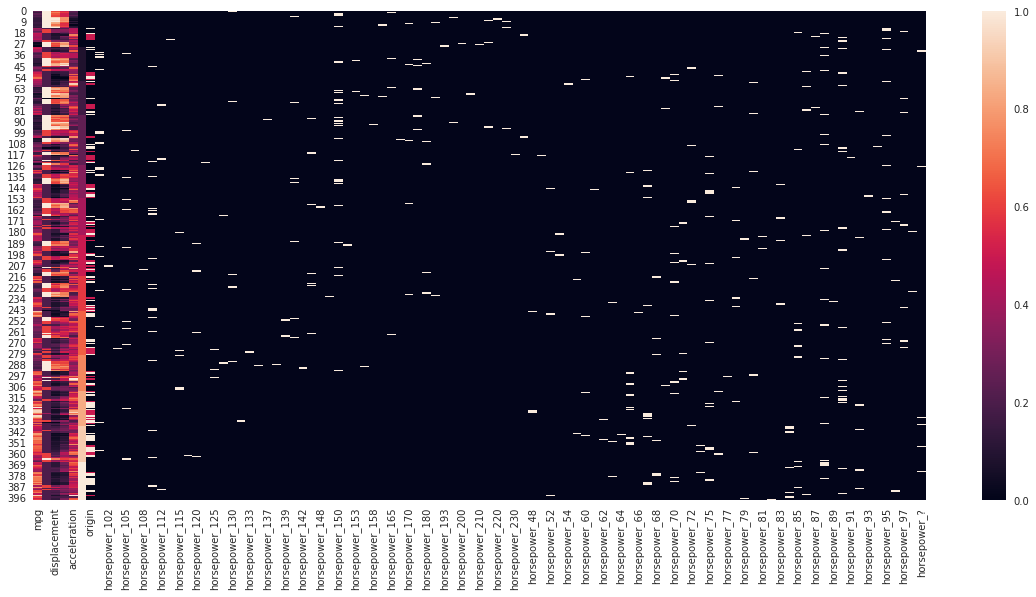

In [137]:
plt.figure(figsize=(20,9))
sns.heatmap(df_scaled)
plt.show()

It was in the same length of data set. Dummy variables seem black and white.

Now we will do **cluster heatmap** by using *clustermap()* method.

<Figure size 1440x648 with 0 Axes>

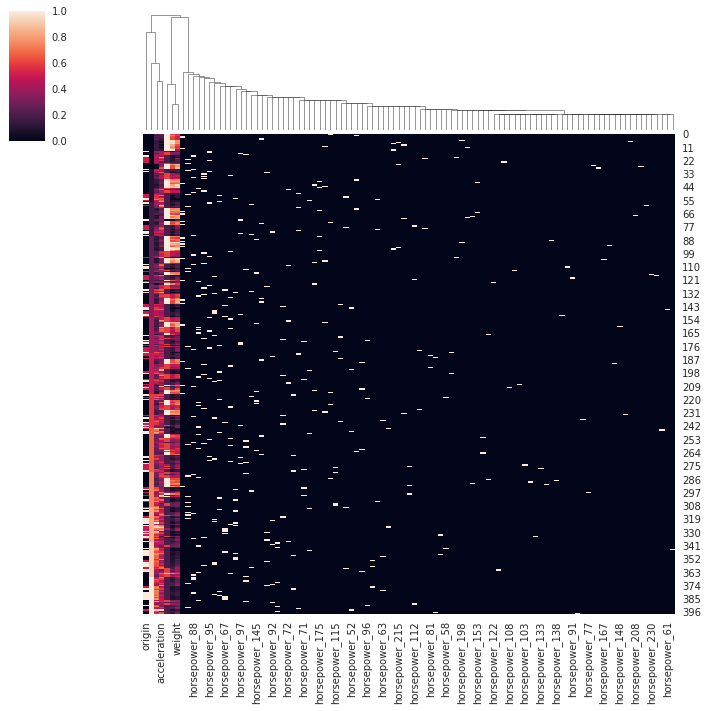

In [138]:
plt.figure(figsize=(20,9))
sns.clustermap(df_scaled,row_cluster=False)
plt.show()

In order to understand the relationships between features, we will make a heatmap of correlations.

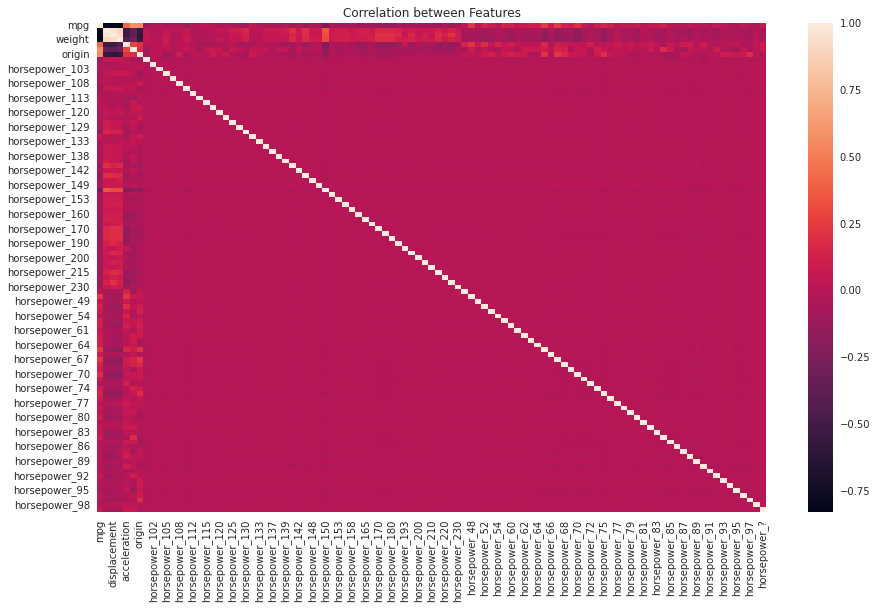

In [139]:
plt.figure(figsize=(15,9))
sns.heatmap(df_scaled.corr())
plt.title("Correlation between Features")
plt.show()

Now we will perform the clustering and assign the labels by using **sklearn**.

In [140]:
hier_model = AgglomerativeClustering(n_clusters=5,affinity="euclidean") #distance_threshold is also important.

If you want to investigate more, please check out the documentation of [Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

In [141]:
cluster_labels = hier_model.fit_predict(df_scaled)

In [142]:
cluster_labels[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

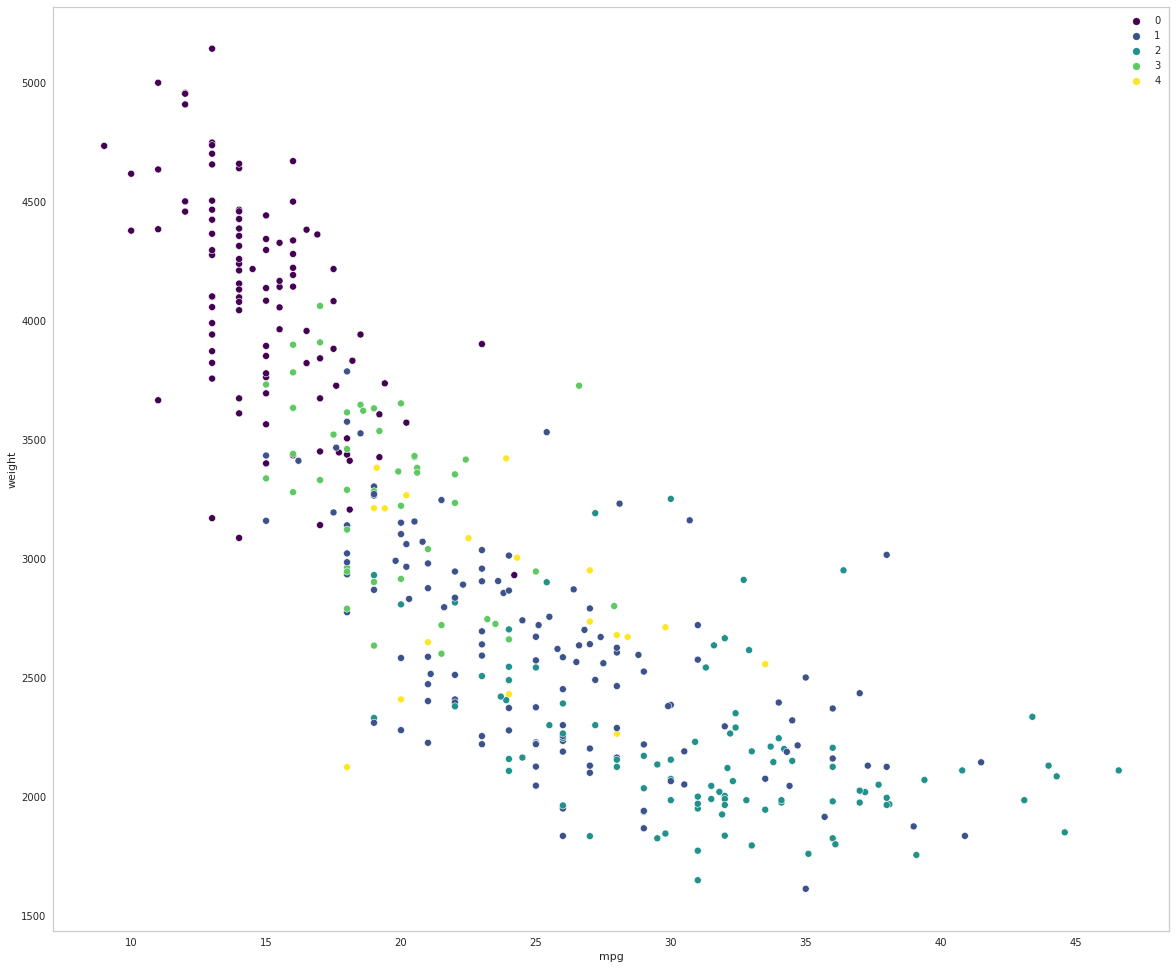

In [143]:
plt.figure(figsize=(20,17))
sns.scatterplot(data=df,x="mpg",y="weight",hue=cluster_labels,palette="viridis")
plt.grid(False)

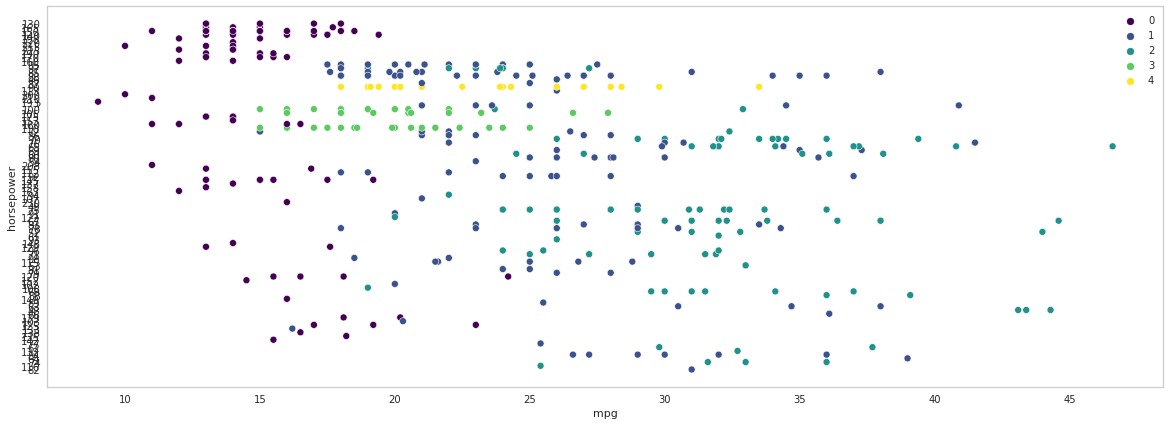

In [144]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=df,x="mpg",y="horsepower",hue=cluster_labels,palette="viridis")
plt.grid(False)

Now we will create the dendogram of the model by getting help from **linkage()** method. It performs hierarchical/agglomerative clustering. If you want learn about more, you can read this [official explanation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) of the library.

In [145]:
linkage_matrix = hierarchy.linkage(hier_model.children_)

In [146]:
linkage_matrix

array([[ 24.        ,  26.        ,   1.41421356,   2.        ],
       [148.        , 154.        ,   1.41421356,   2.        ],
       [103.        , 116.        ,   1.41421356,   2.        ],
       ...,
       [725.        , 789.        ,  70.22819946, 393.        ],
       [319.        , 790.        ,  70.60453243, 394.        ],
       [748.        , 791.        ,  88.05112151, 397.        ]])

In [147]:
linkage_df = pd.DataFrame(linkage_matrix,columns=["First Point","Second Point","Distance Between Points","How many points are there in the cluster?"])
linkage_df.head()

,First Point,Second Point,Distance Between Points,How many points are there in the cluster?
0,24.0,26.0,1.414214,2.0
1,148.0,154.0,1.414214,2.0
2,103.0,116.0,1.414214,2.0
3,46.0,71.0,1.414214,2.0
4,53.0,70.0,1.414214,2.0


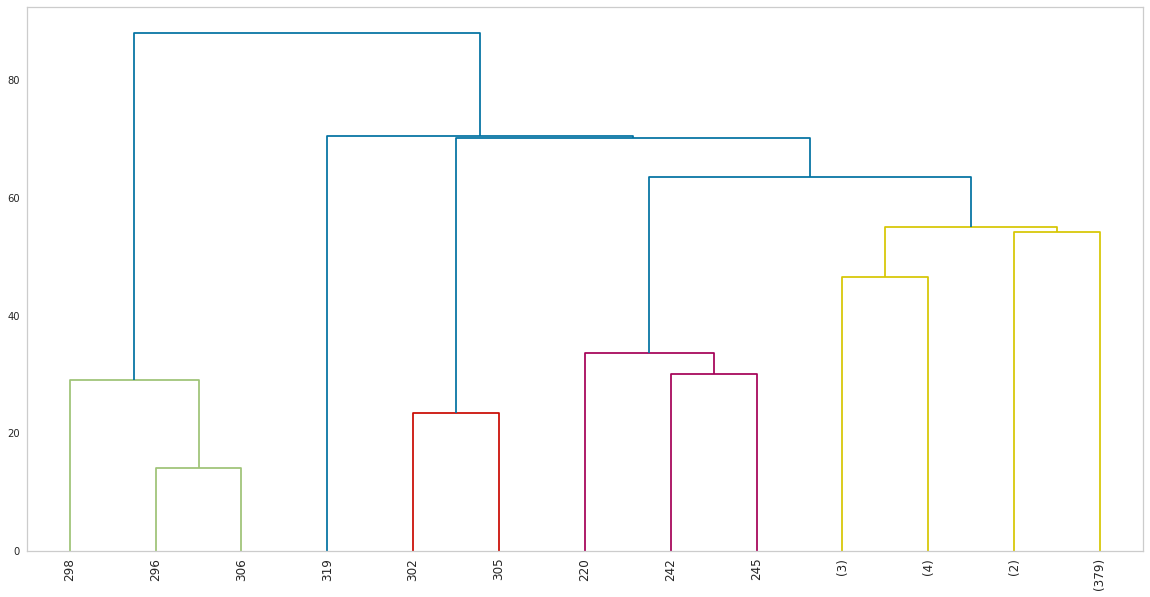

In [148]:
plt.figure(figsize=(20,10))
dendrogram = hierarchy.dendrogram(linkage_matrix,truncate_mode="level",p=5)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

### Extra Model

For a real world example, we will use *Mall Customer Segmentation Data*. This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis.

It can be downloaded from [here](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).

We will understand the dataset first.

In [149]:
df = pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [150]:
df.shape

(200, 5)

In [151]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [152]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


To make a reasonable analysis, we will work only with **Annual Income(k$)** and **Spending Score(1-100)** columns.

In [153]:
X = df.iloc[:, [3, 4]].values

Now we will create a dendrogram to find the optimal number of clusters.

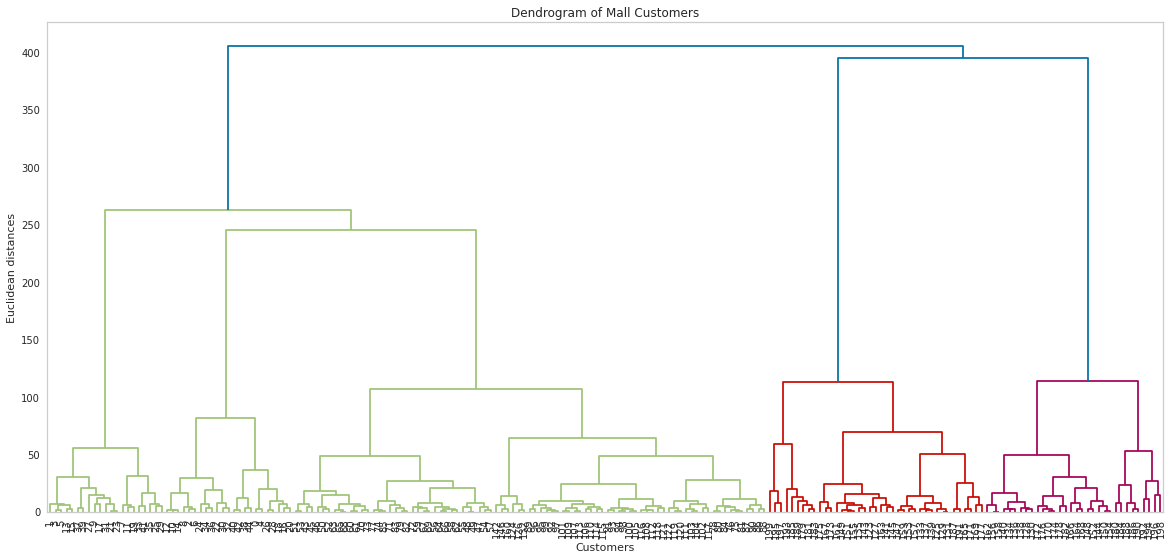

In [154]:
plt.figure(figsize=(20,9))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'),leaf_font_size=10)
plt.title('Dendrogram of Mall Customers')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

Now we will train the Hierarchical Clustering model on the dataset.

In [155]:
hierearchical = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hierearchical = hierearchical.fit_predict(X)

In [156]:
y_hierearchical

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

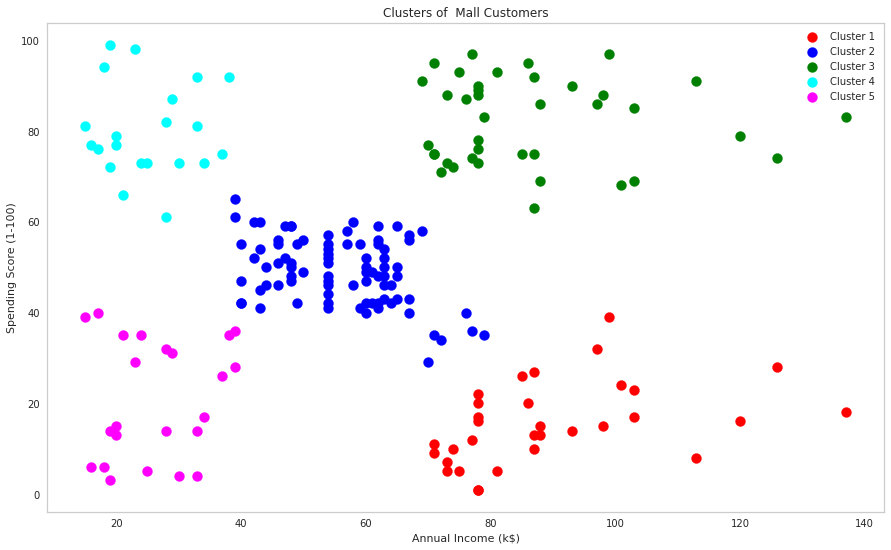

In [157]:
plt.figure(figsize=(15,9))
plt.scatter(X[y_hierearchical == 0, 0], X[y_hierearchical == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hierearchical == 1, 0], X[y_hierearchical == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hierearchical == 2, 0], X[y_hierearchical == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hierearchical == 3, 0], X[y_hierearchical == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hierearchical == 4, 0], X[y_hierearchical == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of  Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(False)
plt.legend()
plt.show()

## DBSCAN (Density-based spatial clustering)  (Theory - Model)

### Theory

Centrally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Now we will focus on the Density-based spatial clustering of applications with noise (DBSCAN) clustering method. 

 What’s nice about DBSCAN is that we don’t have to specify the number of clusters to use it. All we need is a function to calculate the distance between values and some guidance for what amount of distance is considered “close”. DBSCAN also produces more reasonable results than k-means across a variety of different distributions.

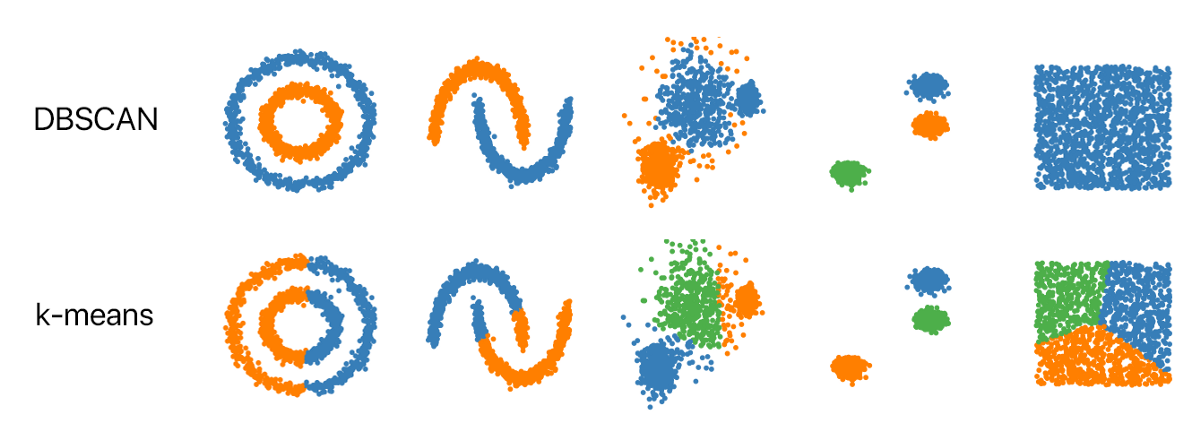

<div class="alert alert-block alert-info">
<b>Reference 5:</b>  Image is taken from *Towards Data Science* website.
</div>


 Density-Based Clustering refers to unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.

 **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)** is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.
 

 The DBSCAN algorithm uses two parameters:

- *eps (ε)*: A distance measure that will be used to locate the points in the neighborhood of any point. For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε-neighborhood.

- *minPts*: The minimum number of points (a threshold) clustered together for a region to be considered dense. If an instance has at least min_samples instances in its ε-neighborhood (including itself), then it is considered a **core instance**. In other words, core instances are those that are located in dense regions. All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.

Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

To check out more, please visit [this](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/) online visualisation tool.

### Model

For a real world example, we will use *Wholesale customers* dataset. The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.

It can be downloaded from [here](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers).

Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)

We will understand the dataset first.

In [158]:
df = pd.read_csv("../input/wholesale-customers-data-set/Wholesale customers data.csv")

In [159]:
df.shape

(440, 8)

In [160]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [161]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Now we will create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.

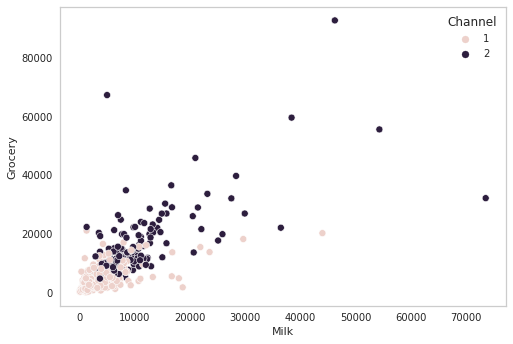

In [162]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel')
plt.grid(False)
plt.show()

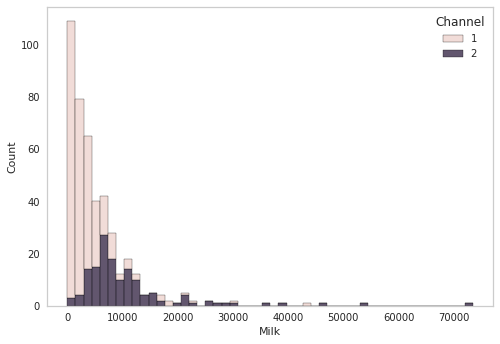

In [163]:
sns.histplot(df,x='Milk',hue='Channel',multiple="stack")
plt.grid(False)
plt.show()

Now we will create an annotated clustermap of the correlations between spending on different categories.

Correlation Between Spending Categories


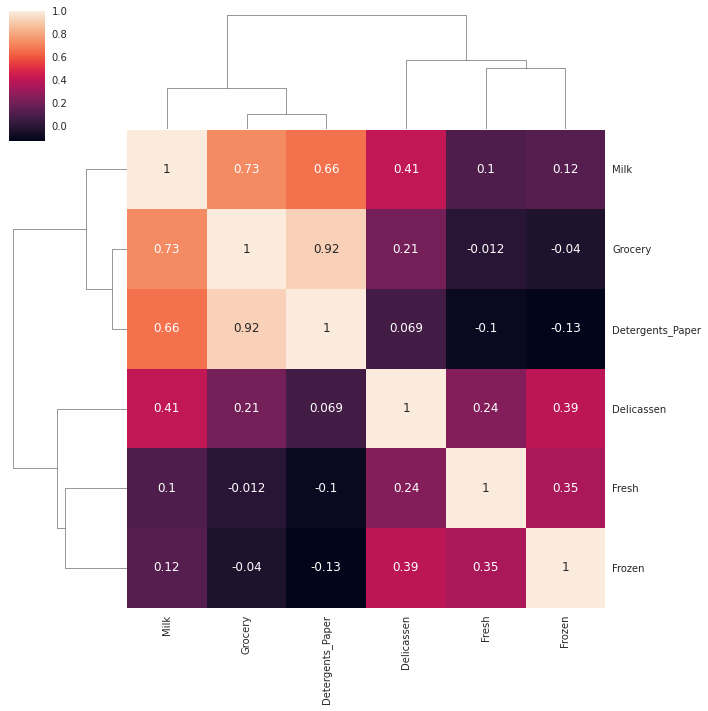

In [164]:
print('Correlation Between Spending Categories')
sns.clustermap(df.drop(['Region','Channel'],axis=1).corr(),annot=True)
plt.grid(False)
plt.show()

We will create a variety of models testing different epsilon values.

In [165]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [166]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

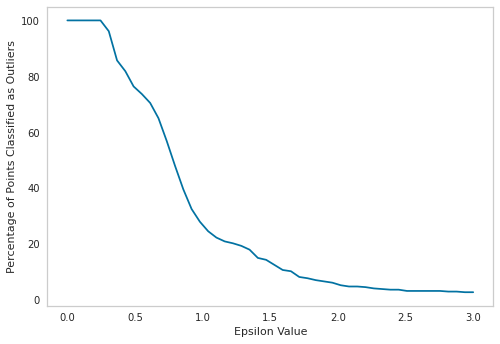

In [167]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.grid(False)
plt.show()

Based on the plot, we will retrain a DBSCAN model with a reasonable epsilon value eps=2.

In [168]:
dbscan = DBSCAN(eps=2)
dbscan.fit(scaled_X)

DBSCAN(eps=2)

In [169]:
df['Labels'] = dbscan.labels_

In [170]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
